# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
# for colormaps
import matplotlib.cm as cm
import itertools

#from pathlib import Path
from IPython.display import display, HTML
import pprint

In [2]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot

In [3]:
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

# Read Data

In [4]:
df_initial = pd.read_excel('dataset/Online Retail.xlsx',\
                           dtype={'CustomerID': str,'InvoiceID': str},\
                           parse_dates=['InvoiceDate'])

# Initial look

In [5]:
df_initial.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [6]:
df_initial.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829,541909
unique,25900.0,4070,4223,NaN,23260,NaN,4372,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,17841,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,7983,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,NaN,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,NaN,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,NaN,NaN


# Cleaning

In [7]:
df_initial.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
(df_initial.isnull().sum() * 100 / df_initial.shape[0]).filter(['Description','CustomerID'])

Description     0.268311
CustomerID     24.926694
dtype: float64

## Remove NAS

In [9]:
df_initial.dropna(subset=['CustomerID'],axis=0,inplace=True)

In [10]:
df_initial.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
df_initial.to_csv('13_final_RemoveNAs.csv',index=False)

## Handle duplicates

opt 1) Remove duplicates

opt 2) Handle duplicates
 * add quantities of duplicate rows

$\color{red}{\text{Do}}$

go with opt 1

In [12]:
df_initial.drop_duplicates(keep='first',inplace=True)

$\color{red}{\text{Verify}}$

In [13]:
df_initial.duplicated().sum()

0

In [14]:
df_initial.to_csv('13_final_RemoveNAs_RemoveDups.csv',index=False)

# Customer and Products

## number of products per customer

In [15]:
df_initial.loc[:,['CustomerID','InvoiceNo','StockCode']].nunique()

CustomerID     4372
InvoiceNo     22190
StockCode      3684
dtype: int64

$\color{red}{\text{Obs}}$ 

Some customers have made multiple transactions

There are transactions with many products in them

In [16]:
grpby_df_initial_CustomerId_InvoiceNo = df_initial.groupby(by=['CustomerID','InvoiceNo'])

In [17]:
grpby_df_initial_CustomerId_InvoiceNo.groups

{('17850', 536365): [0, 1, 2, 3, 4, 5, 6], ('17850', 536366): [7, 8], ('13047', 536367): [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], ('13047', 536368): [21, 22, 23, 24], ('13047', 536369): [25], ('12583', 536370): [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], ('13748', 536371): [46], ('17850', 536372): [47, 48], ('17850', 536373): [49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64], ('15100', 536374): [65], ('17850', 536375): [66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81], ('15291', 536376): [82, 83], ('17850', 536377): [84, 85], ('14688', 536378): [86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104], ('17809', 536380): [105], ('15311', 536381): [106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140], ('14527', 'C536379'): [141], ('16098', 536382): [142, 143, 144, 145,

In [18]:
grpby_df_initial_CustomerId_InvoiceNo.get_group(('13705', 536392))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
242,536392,22150,3 STRIPEY MICE FELTCRAFT,6,2010-12-01 10:29:00,1.95,13705,United Kingdom
243,536392,22619,SET OF 6 SOLDIER SKITTLES,4,2010-12-01 10:29:00,3.75,13705,United Kingdom
244,536392,21891,TRADITIONAL WOODEN SKIPPING ROPE,12,2010-12-01 10:29:00,1.25,13705,United Kingdom
245,536392,21889,WOODEN BOX OF DOMINOES,12,2010-12-01 10:29:00,1.25,13705,United Kingdom
246,536392,22827,RUSTIC SEVENTEEN DRAWER SIDEBOARD,1,2010-12-01 10:29:00,165.00,13705,United Kingdom
247,536392,22127,PARTY CONES CARNIVAL ASSORTED,12,2010-12-01 10:29:00,1.25,13705,United Kingdom
248,536392,22128,PARTY CONES CANDY ASSORTED,12,2010-12-01 10:29:00,1.25,13705,United Kingdom
249,536392,22502,PICNIC BASKET WICKER SMALL,4,2010-12-01 10:29:00,5.95,13705,United Kingdom
250,536392,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2010-12-01 10:29:00,1.69,13705,United Kingdom
251,536392,22338,STAR DECORATION PAINTED ZINC,24,2010-12-01 10:29:00,0.65,13705,United Kingdom


$\color{red}{\text{Obs}}$ 

These are items in one basket

This list represents a receipt of a transaction

$\color{red}{\text{Do}}$

Find the number of products in baskets

In [19]:
list_count_ProductsPerCustomerPerTransaction =\
grpby_df_initial_CustomerId_InvoiceNo.aggregate('count')['StockCode'].values

In [20]:
list_count_ProductsPerCustomerPerTransaction

array([ 1,  1, 31, ..., 29, 38,  3], dtype=int64)

In [21]:
len(list_count_ProductsPerCustomerPerTransaction)

22190

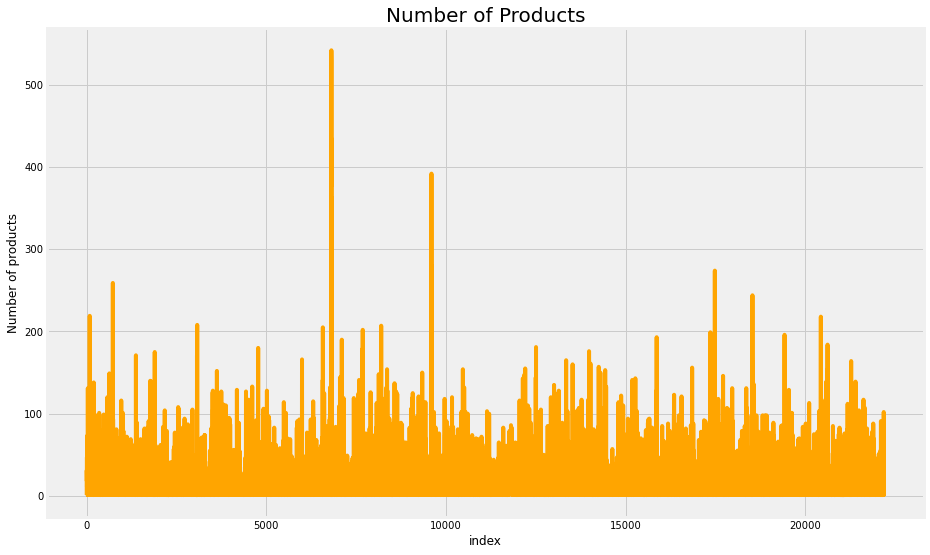

In [22]:
plt.figure(figsize=(14,9))
plt.title("Number of Products",fontdict={'fontsize':20})
plt.xlabel("index")
plt.ylabel("Number of products")
plt.plot(list_count_ProductsPerCustomerPerTransaction,color='orange')

{'whiskers': [<matplotlib.lines.Line2D at 0x2041777e8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2041777ef70>,
 'boxes': [<matplotlib.lines.Line2D at 0x2041777e550>],
 'medians': [<matplotlib.lines.Line2D at 0x204177746a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20417774a00>],
 'means': []}

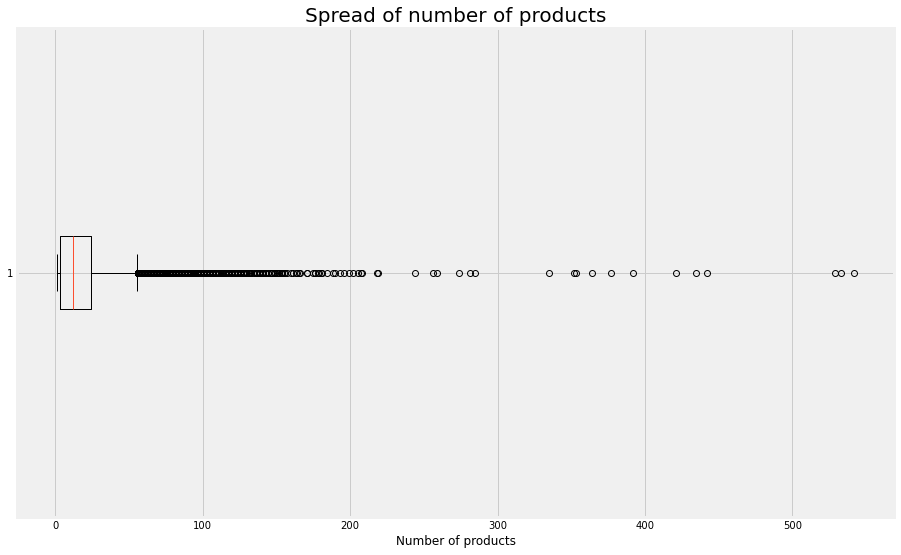

In [23]:
plt.figure(figsize=(14,9))
plt.title("Spread of number of products",fontdict={'fontsize':20})
plt.xlabel("Number of products")
plt.boxplot(list_count_ProductsPerCustomerPerTransaction,vert=False)

<AxesSubplot:title={'center':'Density of Number of Products'}, xlabel='number of products', ylabel='kde'>

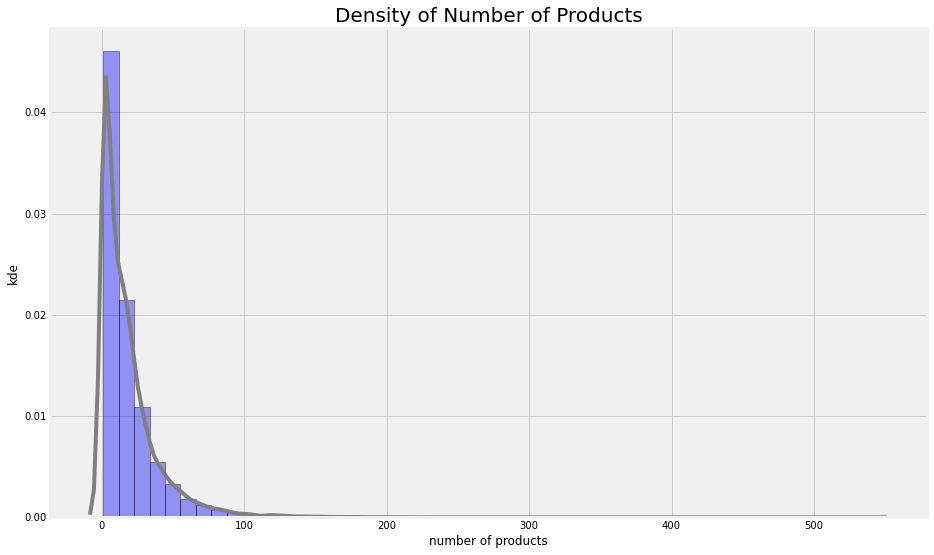

In [24]:
# Density Plot and Histogram of all arrival delays
plt.figure(figsize=(14,9))
plt.title("Density of Number of Products",fontdict={'fontsize':20})
plt.xlabel("number of products")
plt.ylabel("kde")
sns.distplot(list_count_ProductsPerCustomerPerTransaction, hist=True, kde=True, 
             bins=50, color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4,'color':'grey'})

$\color{red}{\text{Obs}}$

Most customers buy around 20 to 30 products in a transaction

$\color{red}{\text{Do}}$

Create a dataframe which tells us about number of products bought by a customer in a transaction

In [25]:
dict_noOfProducts={"CustomerID":[],"InvoiceNo":[],"Number of products":[]}

for i,custid_invn in enumerate(grpby_df_initial_CustomerId_InvoiceNo.groups.keys()):
    dict_noOfProducts["CustomerID"].append(custid_invn[0])
    dict_noOfProducts["InvoiceNo"].append(custid_invn[1])
    dict_noOfProducts["Number of products"].append(list_count_ProductsPerCustomerPerTransaction[i])

In [26]:
df_noOfProducts=pd.DataFrame(dict_noOfProducts)
df_noOfProducts.head()

,CustomerID,InvoiceNo,Number of products
0,17850,536365,1
1,17850,536366,1
2,13047,536367,31
3,13047,536368,29
4,13047,536369,24


## Handle special StockCodes

$\color{red}{\text{Do}}$

Find StockCodes which start with a letter

In [27]:
list_specialCodes = df_initial[df_initial['StockCode'].str.contains('^[a-zA-Z]+', regex=True).fillna(False)]['StockCode'].unique()
list_specialCodes

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK'],
      dtype=object)

In [28]:
for stcode in list_specialCodes:
    print("{:<15} -> {:<30}".format(stcode, df_initial[df_initial['StockCode'] == stcode]['Description'].unique()[0]))

POST            -> POSTAGE                       
D               -> Discount                      
C2              -> CARRIAGE                      
M               -> Manual                        
BANK CHARGES    -> Bank Charges                  
PADS            -> PADS TO MATCH ALL CUSHIONS    
DOT             -> DOTCOM POSTAGE                
CRUK            -> CRUK Commission               


$\color{red}{\text{Obs}}$

These are special codes, which serve no purpose in customer segmentation.

reason: These are regular charges, its not based on customer

$\color{red}{\text{Do}}$

Delete the rows which have Stockcodes starting with a letter

row = (index, value)

value =(stcode, invn, date, quantity...)

In [29]:
list_index_UnnecessaryStockCode=[]
for row in df_initial.iterrows():
    if row[1]['StockCode'] in list_specialCodes:
        list_index_UnnecessaryStockCode.append(row[0])

In [30]:
# we will delete these rows
df_initial.loc[list_index_UnnecessaryStockCode]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583,France
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662,Germany
1423,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.00,14911,EIRE
...,...,...,...,...,...,...,...,...
541216,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.00,12518,Germany
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662,Germany
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526,Germany


In [31]:
df_initial.drop(list_index_UnnecessaryStockCode,inplace=True)

In [32]:
df_initial.to_csv('13_final_RemoveNAs_RemoveDups_RmStcodeWithWords.csv',index=False)

## Handle Cancelled orders

$\color{red}{\text{Check}}$

The rows having negative quantity and rows having Invoice code starting with "C" are same

In [33]:
df_negQuantity = df_initial[  df_initial['Quantity']<0  ]

In [34]:
df_invnStartsWithC = df_initial[  df_initial['InvoiceNo'].str.startswith("C").fillna(False)  ]

In [35]:
(df_negQuantity == df_invnStartsWithC).all().all()

True

$\color{red}{\text{Check Answer}}$

The rows for which quantity is negative are the rows with InvoiceNo starting with "C".

$\color{red}{\text{Do}}$

Create a column which tells whether the transaction corresponds to cancelled transaction or not

In [36]:
df_noOfProducts['Order Cancelled Boolean'] = df_noOfProducts['InvoiceNo'].apply(  lambda x:int('C' in str(x))  )

In [37]:
df_noOfProducts[   df_noOfProducts['InvoiceNo'].str.startswith("C").fillna(False)  ].head()

,CustomerID,InvoiceNo,Number of products,Order Cancelled Boolean
16,14527,C536379,5,1
18,15311,C536383,7,1
26,17548,C536391,4,1
62,17897,C536506,22,1
87,17841,C536543,1,1


In [38]:
df_noOfProducts.head()

,CustomerID,InvoiceNo,Number of products,Order Cancelled Boolean
0,17850,536365,1,0
1,17850,536366,1,0
2,13047,536367,31,0
3,13047,536368,29,0
4,13047,536369,24,0


$\color{red}{\text{Do}}$

Create a df with no cancelled orders and then delete the orders which were cancelled from the main dataframe

In [39]:
df_withoutCancelledOrders=df_initial.drop(df_invnStartsWithC.index)

In [40]:
df_withoutCancelledOrders.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [41]:
df_initial.shape

(399689, 8)

In [42]:
df_withoutCancelledOrders.shape

(391183, 8)

In [43]:
df_invnStartsWithC.shape

(8506, 8)

In [44]:
df_initial.shape[0] - df_withoutCancelledOrders.shape[0] == df_invnStartsWithC.shape[0]

True

$\color{red}{\text{Check}}$ 

Cxyz is an invoice code of cancelled order then xyz is the "opposite order"

In [45]:
list_calcelledOrdersWhoseOppExists=[]

for invn in df_invnStartsWithC['InvoiceNo'].unique():
    if invn[1:] in df_withoutCancelledOrders['InvoiceNo'].unique():
        print(invn)
        list_calcelledOrdersWhoseOppExists.append(invn)

print(len(list_calcelledOrdersWhoseOppExists))

0


$\color{red}{\text{Check Answer}}$ 

No such relation

$\color{red}{\text{Manual Check}}$

In [46]:
df_invnStartsWithC['InvoiceNo']

154       C536383
235       C536391
236       C536391
237       C536391
238       C536391
           ...   
540448    C581490
540449    C581490
541715    C581568
541716    C581569
541717    C581569
Name: InvoiceNo, Length: 8506, dtype: object

In [47]:
df_initial.loc[df_initial['InvoiceNo']=='C536383']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom


In [48]:
df_initial.loc[df_initial['InvoiceNo']=='536383']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


$\color{red}{\text{Manual check answer}}$ 

failed

$\color{red}{\text{Check answer}}$ 

Cxyz is invoice code of cancelled order then xyz is the opposite order, is false

In [49]:
df_invnStartsWithC.nunique()

InvoiceNo      3383
StockCode      1915
Description    1940
Quantity        132
InvoiceDate    3324
UnitPrice       152
CustomerID     1534
Country          26
dtype: int64

$\color{red}{\text{Obs}}$ 

There exists a customer who has made multiple returns

1915 products have been cancelled

$\color{red}{\text{Do}}$  

Find products which are cancelled but have no record of purchase, delete such entries

$\color{red}{\text{Plan}}$   

subtract the set of available products from cancelled products 

In [50]:
setA={1,2,3}
setB={1,2,4}
set.difference(setA,setB)  # acts like setA - setB

{3}

In [51]:
list_productsHavingNoRecordOfPurchase_ButAreCancelled= \
set.difference(
    set(   df_invnStartsWithC['StockCode'].unique()   ),\
    set(   df_withoutCancelledOrders['StockCode'].unique()   )
              )

In [52]:
len(list_productsHavingNoRecordOfPurchase_ButAreCancelled)

17

In [53]:
list_productsHavingNoRecordOfPurchase_ButAreCancelled

{20957,
 21144,
 21412,
 21645,
 35832,
 37503,
 79320,
 '79323W',
 84839,
 '84856S',
 '85023C',
 85042,
 85063,
 85065,
 85068,
 '85098B',
 85126}

$\color{red}{\text{Verify}}$   

In [54]:
df_withoutCancelledOrders[  df_withoutCancelledOrders['StockCode']==20957  ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [55]:
df_invnStartsWithC[df_invnStartsWithC['StockCode']==20957]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1985,C536548,20957,PORCELAIN HANGING BELL SMALL,-1,2010-12-01 14:33:00,1.45,12472,Germany


In [56]:
len(
    set(df_invnStartsWithC['StockCode'].unique()).intersection(
    set(df_withoutCancelledOrders['StockCode'].unique())       )
    )

1898

$\color{red}{\text{Obs}}$    

Out of the 1915 cancelled products only 1898 products may have their purchase record

$\color{red}{\text{Info}}$   

Used "may" because the "opposite purchase" is not yet defined

$\color{red}{\text{Obs}}$

There are the 17 products which are cancelled but no purchase record is there, we will remove these from df_invnStartsWithC

$\color{red}{\text{Do}}$ 

Find indexes who have these 17 products

In [57]:
df_invnStartsWithC.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom


In [58]:
list_index_productsHavingNoRecordOfPurchase_ButAreCancelled =[]
for row in df_invnStartsWithC.iterrows():
    if row[1]['StockCode'] in list_productsHavingNoRecordOfPurchase_ButAreCancelled:
        list_index_productsHavingNoRecordOfPurchase_ButAreCancelled.append(row[0])

In [59]:
list_index_productsHavingNoRecordOfPurchase_ButAreCancelled

[1985,
 17453,
 29282,
 31136,
 44298,
 44299,
 44916,
 44924,
 45915,
 47170,
 49847,
 63670,
 73936,
 78331,
 97681,
 117994,
 144098,
 152578,
 155729]

In [60]:
len(list_index_productsHavingNoRecordOfPurchase_ButAreCancelled)

19

$\color{red}{\text{Obs}}$ 

There are 19 entries corresponding to cancelled products, of which there is no record of purchase

$\color{red}{\text{Do}}$ 

Drop them

In [61]:
df_invnStartsWithC.drop(list_index_productsHavingNoRecordOfPurchase_ButAreCancelled,inplace=True)

In [62]:
df_invnStartsWithC.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom


$\color{red}{\text{Check}}$ 

Whether customers who have cancelled an order of product x have made more than 1 orders of the product in single transaction

In [63]:
grpby_df_invnStartsWithC_CustomerID_InvoiceNo = df_invnStartsWithC.groupby(['CustomerID','InvoiceNo'])

In [64]:
(grpby_df_invnStartsWithC_CustomerID_InvoiceNo.count()['StockCode'] -\
 grpby_df_invnStartsWithC_CustomerID_InvoiceNo.nunique()['StockCode'])

CustomerID  InvoiceNo
12346       C541433      0
12352       C547388      0
12359       C549955      0
            C580165      0
12362       C544902      0
                        ..
18274       C577832      0
18276       C577386      0
            C577390      0
18277       C542086      0
18282       C562808      0
Name: StockCode, Length: 3378, dtype: int64

In [65]:
(grpby_df_invnStartsWithC_CustomerID_InvoiceNo.count()['StockCode'] -\
 grpby_df_invnStartsWithC_CustomerID_InvoiceNo.nunique()['StockCode']).sum()

31

$\color{red}{\text{Obs}}$

There are some entries where duplicate have occured

In [66]:
grpby_df_invnStartsWithC_CustomerID_InvoiceNo.count()['StockCode']

CustomerID  InvoiceNo
12346       C541433       1
12352       C547388       7
12359       C549955       2
            C580165       4
12362       C544902       2
                         ..
18274       C577832      11
18276       C577386       1
            C577390       1
18277       C542086       1
18282       C562808       1
Name: StockCode, Length: 3378, dtype: int64

In [67]:
grpby_df_invnStartsWithC_CustomerID_InvoiceNo['StockCode'].nunique()

CustomerID  InvoiceNo
12346       C541433       1
12352       C547388       7
12359       C549955       2
            C580165       4
12362       C544902       2
                         ..
18274       C577832      11
18276       C577386       1
            C577390       1
18277       C542086       1
18282       C562808       1
Name: StockCode, Length: 3378, dtype: int64

In [68]:
(grpby_df_invnStartsWithC_CustomerID_InvoiceNo.count()['StockCode'] !=\
 grpby_df_invnStartsWithC_CustomerID_InvoiceNo['StockCode'].nunique()).sum()

20

$\color{red}{\text{Obs}}$

There are 20 pairs of (customerID, InvoiceNo) where duplicate entries are made

In [69]:
grpby_df_invnStartsWithC_CustomerID_InvoiceNo_StockCode =\
df_invnStartsWithC.groupby(['CustomerID','InvoiceNo','StockCode'])

In [70]:
grpby_df_invnStartsWithC_CustomerID_InvoiceNo_StockCode.groups

{('15311', 'C536383', '35004C'): [154], ('17548', 'C536391', 22556): [235], ('17548', 'C536391', 21984): [236], ('17548', 'C536391', 21983): [237], ('17548', 'C536391', 21980): [238], ('17548', 'C536391', 21484): [239], ('17548', 'C536391', 22557): [240], ('17548', 'C536391', 22553): [241], ('17897', 'C536506', 22960): [939], ('17841', 'C536543', 22632): [1441], ('17841', 'C536543', 22355): [1442], ('12472', 'C536548', 22244): [1973], ('12472', 'C536548', 22242): [1974], ('12472', 'C536548', 20914): [1975], ('12472', 'C536548', 22892): [1976], ('12472', 'C536548', 22654): [1977], ('12472', 'C536548', 22767): [1978], ('12472', 'C536548', 22333): [1979], ('12472', 'C536548', 22245): [1980], ('12472', 'C536548', 22077): [1981], ('12472', 'C536548', 22631): [1982], ('12472', 'C536548', 22168): [1983], ('12472', 'C536548', 21218): [1984], ('12472', 'C536548', 22580): [1986], ('14092', 'C536606', 20914): [3170], ('12471', 'C536622', 22752): [3338], ('14766', 'C536625', 22839): [3410], ('1439

In [71]:
grpby_df_invnStartsWithC_CustomerID_InvoiceNo_StockCode.get_group(('15311', 'C536383', '35004C'))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom


In [72]:
for indexes in grpby_df_invnStartsWithC_CustomerID_InvoiceNo_StockCode.groups.values():
    if len(indexes)>1:
        display(df_invnStartsWithC.loc[indexes])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4939,C536826,35004B,SET OF 3 BLACK FLYING DUCKS,-2,2010-12-02 17:30:00,4.65,17924,United Kingdom
4940,C536826,35004B,SET OF 3 BLACK FLYING DUCKS,-3,2010-12-02 17:30:00,4.65,17924,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
24159,C538341,22988,SOLDIERS EGG CUP,-36,2010-12-10 14:03:00,1.25,15514,United Kingdom
24160,C538341,22988,SOLDIERS EGG CUP,-12,2010-12-10 14:03:00,1.25,15514,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
24170,C538341,22729,ALARM CLOCK BAKELIKE ORANGE,-4,2010-12-10 14:03:00,3.75,15514,United Kingdom
24171,C538341,22729,ALARM CLOCK BAKELIKE ORANGE,-1,2010-12-10 14:03:00,3.75,15514,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
24172,C538341,22728,ALARM CLOCK BAKELIKE PINK,-1,2010-12-10 14:03:00,3.75,15514,United Kingdom
24173,C538341,22728,ALARM CLOCK BAKELIKE PINK,-3,2010-12-10 14:03:00,3.75,15514,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
24174,C538341,22727,ALARM CLOCK BAKELIKE RED,-1,2010-12-10 14:03:00,3.75,15514,United Kingdom
24175,C538341,22727,ALARM CLOCK BAKELIKE RED,-2,2010-12-10 14:03:00,3.75,15514,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
24178,C538341,22726,ALARM CLOCK BAKELIKE GREEN,-1,2010-12-10 14:03:00,3.75,15514,United Kingdom
24179,C538341,22726,ALARM CLOCK BAKELIKE GREEN,-2,2010-12-10 14:03:00,3.75,15514,United Kingdom
24180,C538341,22726,ALARM CLOCK BAKELIKE GREEN,-3,2010-12-10 14:03:00,3.75,15514,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
24182,C538341,22725,ALARM CLOCK BAKELIKE CHOCOLATE,-1,2010-12-10 14:03:00,3.75,15514,United Kingdom
24184,C538341,22725,ALARM CLOCK BAKELIKE CHOCOLATE,-3,2010-12-10 14:03:00,3.75,15514,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
39439,C539644,21232,STRAWBERRY CERAMIC TRINKET BOX,-2,2010-12-20 15:52:00,1.25,12471,Germany
39442,C539644,21232,STRAWBERRY CERAMIC TRINKET BOX,-4,2010-12-20 15:52:00,1.25,12471,Germany


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
49852,C540535,21232,STRAWBERRY CERAMIC TRINKET BOX,-2,2011-01-09 14:17:00,1.25,15005,United Kingdom
49857,C540535,21232,STRAWBERRY CERAMIC TRINKET BOX,-1,2011-01-09 14:17:00,1.25,15005,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
68350,C541863,21231,SWEETHEART CERAMIC TRINKET BOX,-4,2011-01-23 16:08:00,1.06,13798,United Kingdom
68366,C541863,21231,SWEETHEART CERAMIC TRINKET BOX,-9,2011-01-23 16:08:00,1.06,13798,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
68358,C541863,82583,HOT BATHS METAL SIGN,-1,2011-01-23 16:08:00,1.69,13798,United Kingdom
68364,C541863,82583,HOT BATHS METAL SIGN,-5,2011-01-23 16:08:00,1.69,13798,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
74268,C542413,21876,POTTERING MUG,-1,2011-01-27 17:11:00,1.25,16923,United Kingdom
74274,C542413,21876,POTTERING MUG,-5,2011-01-27 17:11:00,1.25,16923,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
86888,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-1,2011-02-10 14:38:00,4.95,17850,United Kingdom
86897,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-2,2011-02-10 14:38:00,4.95,17850,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
86892,C543611,82494L,WOODEN FRAME ANTIQUE WHITE,-2,2011-02-10 14:38:00,2.55,17850,United Kingdom
86895,C543611,82494L,WOODEN FRAME ANTIQUE WHITE,-12,2011-02-10 14:38:00,2.55,17850,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
86893,C543611,21730,GLASS STAR FROSTED T-LIGHT HOLDER,-1,2011-02-10 14:38:00,4.25,17850,United Kingdom
86894,C543611,21730,GLASS STAR FROSTED T-LIGHT HOLDER,-1,2011-02-10 14:38:00,4.95,17850,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
140796,C548463,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-18,2011-03-31 12:11:00,5.95,13225,United Kingdom
140797,C548463,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-46,2011-03-31 12:11:00,5.95,13225,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
153135,C549731,21399,BLUE POLKADOT COFFEE MUG,-1,2011-04-11 16:36:00,0.39,13266,United Kingdom
153137,C549731,21399,BLUE POLKADOT COFFEE MUG,-48,2011-04-11 16:36:00,0.39,13266,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
240319,C558097,22167,OVAL WALL MIRROR DIAMANTE,-2,2011-06-26 13:29:00,9.95,15532,United Kingdom
240322,C558097,22167,OVAL WALL MIRROR DIAMANTE,-1,2011-06-26 13:29:00,9.95,15532,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
273691,C560855,21205,MULTICOLOUR 3D BALLS GARLAND,-1,2011-07-21 13:00:00,2.55,14410,United Kingdom
273692,C560855,21205,MULTICOLOUR 3D BALLS GARLAND,-2,2011-07-21 13:00:00,2.55,14410,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
331279,C566007,21790,VINTAGE SNAP CARDS,-24,2011-09-08 12:03:00,0.85,16076,United Kingdom
331280,C566007,21790,VINTAGE SNAP CARDS,-48,2011-09-08 12:03:00,0.85,16076,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
378637,C569655,22961,JAM MAKING SET PRINTED,-1,2011-10-05 12:58:00,1.45,14534,United Kingdom
378652,C569655,22961,JAM MAKING SET PRINTED,-2,2011-10-05 12:58:00,1.45,14534,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
383083,C569996,23221,REINDEER HEART DECORATION SILVER,-12,2011-10-06 20:38:00,0.83,15322,United Kingdom
383088,C569996,23221,REINDEER HEART DECORATION SILVER,-10,2011-10-06 20:38:00,0.83,15322,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
384021,C570099,82583,HOT BATHS METAL SIGN,-1,2011-10-07 12:11:00,1.85,13798,United Kingdom
384024,C570099,82583,HOT BATHS METAL SIGN,-4,2011-10-07 12:11:00,1.85,13798,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
384029,C570099,85099B,JUMBO BAG RED RETROSPOT,-1,2011-10-07 12:11:00,1.65,13798,United Kingdom
384035,C570099,85099B,JUMBO BAG RED RETROSPOT,-4,2011-10-07 12:11:00,1.65,13798,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
384037,C570099,21231,SWEETHEART CERAMIC TRINKET BOX,-3,2011-10-07 12:11:00,1.06,13798,United Kingdom
384040,C570099,21231,SWEETHEART CERAMIC TRINKET BOX,-6,2011-10-07 12:11:00,1.06,13798,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
385927,C570221,20725,LUNCH BAG RED RETROSPOT,-1,2011-10-09 12:56:00,1.65,13113,United Kingdom
385938,C570221,20725,LUNCH BAG RED RETROSPOT,-10,2011-10-09 12:56:00,1.65,13113,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
390541,C570556,22273,FELTCRAFT DOLL MOLLY,-720,2011-10-11 11:10:00,2.30,16029,United Kingdom
390547,C570556,22273,FELTCRAFT DOLL MOLLY,-720,2011-10-11 11:10:00,2.55,16029,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
431807,C573756,21232,STRAWBERRY CERAMIC TRINKET POT,-9,2011-11-01 09:46:00,1.25,17865,United Kingdom
431808,C573756,21232,STRAWBERRY CERAMIC TRINKET POT,-6,2011-11-01 09:46:00,1.25,17865,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
446818,C574922,22635,CHILDS BREAKFAST SET DOLLY GIRL,-8,2011-11-07 16:39:00,8.5,15502,United Kingdom
446819,C574922,22635,CHILDS BREAKFAST SET DOLLY GIRL,-67,2011-11-07 16:39:00,8.5,15502,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
531799,C580968,23534,WALL ART STOP FOR TEA,-4,2011-12-06 14:57:00,5.95,15622,United Kingdom
531800,C580968,23534,WALL ART STOP FOR TEA,-3,2011-12-06 14:57:00,5.95,15622,United Kingdom


In [73]:
(grpby_df_invnStartsWithC_CustomerID_InvoiceNo_StockCode.size()>1 ).sum()

30

$\color{red}{\text{Obs}}$ 

There are 30 pairs (custid, invnno, stcode) where cancelled products are repeated

$\color{red}{\text{Do}}$ 

Find them and add their quantities

In [74]:
count=0
list_repeatedCalcelledProductsInAnInvoice = []
for custid_invn_stcode, indexes in grpby_df_invnStartsWithC_CustomerID_InvoiceNo_StockCode.groups.items():
    #print(custid_invn_stcode)
    if grpby_df_invnStartsWithC_CustomerID_InvoiceNo_StockCode.get_group(custid_invn_stcode).shape[0] >1:
            display(df_invnStartsWithC.loc[indexes])
            list_repeatedCalcelledProductsInAnInvoice.append(custid_invn_stcode)
len(list_repeatedCalcelledProductsInAnInvoice)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4939,C536826,35004B,SET OF 3 BLACK FLYING DUCKS,-2,2010-12-02 17:30:00,4.65,17924,United Kingdom
4940,C536826,35004B,SET OF 3 BLACK FLYING DUCKS,-3,2010-12-02 17:30:00,4.65,17924,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
24159,C538341,22988,SOLDIERS EGG CUP,-36,2010-12-10 14:03:00,1.25,15514,United Kingdom
24160,C538341,22988,SOLDIERS EGG CUP,-12,2010-12-10 14:03:00,1.25,15514,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
24170,C538341,22729,ALARM CLOCK BAKELIKE ORANGE,-4,2010-12-10 14:03:00,3.75,15514,United Kingdom
24171,C538341,22729,ALARM CLOCK BAKELIKE ORANGE,-1,2010-12-10 14:03:00,3.75,15514,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
24172,C538341,22728,ALARM CLOCK BAKELIKE PINK,-1,2010-12-10 14:03:00,3.75,15514,United Kingdom
24173,C538341,22728,ALARM CLOCK BAKELIKE PINK,-3,2010-12-10 14:03:00,3.75,15514,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
24174,C538341,22727,ALARM CLOCK BAKELIKE RED,-1,2010-12-10 14:03:00,3.75,15514,United Kingdom
24175,C538341,22727,ALARM CLOCK BAKELIKE RED,-2,2010-12-10 14:03:00,3.75,15514,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
24178,C538341,22726,ALARM CLOCK BAKELIKE GREEN,-1,2010-12-10 14:03:00,3.75,15514,United Kingdom
24179,C538341,22726,ALARM CLOCK BAKELIKE GREEN,-2,2010-12-10 14:03:00,3.75,15514,United Kingdom
24180,C538341,22726,ALARM CLOCK BAKELIKE GREEN,-3,2010-12-10 14:03:00,3.75,15514,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
24182,C538341,22725,ALARM CLOCK BAKELIKE CHOCOLATE,-1,2010-12-10 14:03:00,3.75,15514,United Kingdom
24184,C538341,22725,ALARM CLOCK BAKELIKE CHOCOLATE,-3,2010-12-10 14:03:00,3.75,15514,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
39439,C539644,21232,STRAWBERRY CERAMIC TRINKET BOX,-2,2010-12-20 15:52:00,1.25,12471,Germany
39442,C539644,21232,STRAWBERRY CERAMIC TRINKET BOX,-4,2010-12-20 15:52:00,1.25,12471,Germany


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
49852,C540535,21232,STRAWBERRY CERAMIC TRINKET BOX,-2,2011-01-09 14:17:00,1.25,15005,United Kingdom
49857,C540535,21232,STRAWBERRY CERAMIC TRINKET BOX,-1,2011-01-09 14:17:00,1.25,15005,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
68350,C541863,21231,SWEETHEART CERAMIC TRINKET BOX,-4,2011-01-23 16:08:00,1.06,13798,United Kingdom
68366,C541863,21231,SWEETHEART CERAMIC TRINKET BOX,-9,2011-01-23 16:08:00,1.06,13798,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
68358,C541863,82583,HOT BATHS METAL SIGN,-1,2011-01-23 16:08:00,1.69,13798,United Kingdom
68364,C541863,82583,HOT BATHS METAL SIGN,-5,2011-01-23 16:08:00,1.69,13798,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
74268,C542413,21876,POTTERING MUG,-1,2011-01-27 17:11:00,1.25,16923,United Kingdom
74274,C542413,21876,POTTERING MUG,-5,2011-01-27 17:11:00,1.25,16923,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
86888,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-1,2011-02-10 14:38:00,4.95,17850,United Kingdom
86897,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-2,2011-02-10 14:38:00,4.95,17850,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
86892,C543611,82494L,WOODEN FRAME ANTIQUE WHITE,-2,2011-02-10 14:38:00,2.55,17850,United Kingdom
86895,C543611,82494L,WOODEN FRAME ANTIQUE WHITE,-12,2011-02-10 14:38:00,2.55,17850,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
86893,C543611,21730,GLASS STAR FROSTED T-LIGHT HOLDER,-1,2011-02-10 14:38:00,4.25,17850,United Kingdom
86894,C543611,21730,GLASS STAR FROSTED T-LIGHT HOLDER,-1,2011-02-10 14:38:00,4.95,17850,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
140796,C548463,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-18,2011-03-31 12:11:00,5.95,13225,United Kingdom
140797,C548463,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-46,2011-03-31 12:11:00,5.95,13225,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
153135,C549731,21399,BLUE POLKADOT COFFEE MUG,-1,2011-04-11 16:36:00,0.39,13266,United Kingdom
153137,C549731,21399,BLUE POLKADOT COFFEE MUG,-48,2011-04-11 16:36:00,0.39,13266,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
240319,C558097,22167,OVAL WALL MIRROR DIAMANTE,-2,2011-06-26 13:29:00,9.95,15532,United Kingdom
240322,C558097,22167,OVAL WALL MIRROR DIAMANTE,-1,2011-06-26 13:29:00,9.95,15532,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
273691,C560855,21205,MULTICOLOUR 3D BALLS GARLAND,-1,2011-07-21 13:00:00,2.55,14410,United Kingdom
273692,C560855,21205,MULTICOLOUR 3D BALLS GARLAND,-2,2011-07-21 13:00:00,2.55,14410,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
331279,C566007,21790,VINTAGE SNAP CARDS,-24,2011-09-08 12:03:00,0.85,16076,United Kingdom
331280,C566007,21790,VINTAGE SNAP CARDS,-48,2011-09-08 12:03:00,0.85,16076,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
378637,C569655,22961,JAM MAKING SET PRINTED,-1,2011-10-05 12:58:00,1.45,14534,United Kingdom
378652,C569655,22961,JAM MAKING SET PRINTED,-2,2011-10-05 12:58:00,1.45,14534,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
383083,C569996,23221,REINDEER HEART DECORATION SILVER,-12,2011-10-06 20:38:00,0.83,15322,United Kingdom
383088,C569996,23221,REINDEER HEART DECORATION SILVER,-10,2011-10-06 20:38:00,0.83,15322,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
384021,C570099,82583,HOT BATHS METAL SIGN,-1,2011-10-07 12:11:00,1.85,13798,United Kingdom
384024,C570099,82583,HOT BATHS METAL SIGN,-4,2011-10-07 12:11:00,1.85,13798,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
384029,C570099,85099B,JUMBO BAG RED RETROSPOT,-1,2011-10-07 12:11:00,1.65,13798,United Kingdom
384035,C570099,85099B,JUMBO BAG RED RETROSPOT,-4,2011-10-07 12:11:00,1.65,13798,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
384037,C570099,21231,SWEETHEART CERAMIC TRINKET BOX,-3,2011-10-07 12:11:00,1.06,13798,United Kingdom
384040,C570099,21231,SWEETHEART CERAMIC TRINKET BOX,-6,2011-10-07 12:11:00,1.06,13798,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
385927,C570221,20725,LUNCH BAG RED RETROSPOT,-1,2011-10-09 12:56:00,1.65,13113,United Kingdom
385938,C570221,20725,LUNCH BAG RED RETROSPOT,-10,2011-10-09 12:56:00,1.65,13113,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
390541,C570556,22273,FELTCRAFT DOLL MOLLY,-720,2011-10-11 11:10:00,2.30,16029,United Kingdom
390547,C570556,22273,FELTCRAFT DOLL MOLLY,-720,2011-10-11 11:10:00,2.55,16029,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
431807,C573756,21232,STRAWBERRY CERAMIC TRINKET POT,-9,2011-11-01 09:46:00,1.25,17865,United Kingdom
431808,C573756,21232,STRAWBERRY CERAMIC TRINKET POT,-6,2011-11-01 09:46:00,1.25,17865,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
446818,C574922,22635,CHILDS BREAKFAST SET DOLLY GIRL,-8,2011-11-07 16:39:00,8.5,15502,United Kingdom
446819,C574922,22635,CHILDS BREAKFAST SET DOLLY GIRL,-67,2011-11-07 16:39:00,8.5,15502,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
531799,C580968,23534,WALL ART STOP FOR TEA,-4,2011-12-06 14:57:00,5.95,15622,United Kingdom
531800,C580968,23534,WALL ART STOP FOR TEA,-3,2011-12-06 14:57:00,5.95,15622,United Kingdom


30

$\color{red}{\text{Chcek}}$ 

This 30 findings differ in unit price?

In [75]:
for custid_invn_stcode, indexes in grpby_df_invnStartsWithC_CustomerID_InvoiceNo_StockCode.groups.items():
    if grpby_df_invnStartsWithC_CustomerID_InvoiceNo_StockCode.get_group(custid_invn_stcode)['UnitPrice'].nunique() >1:
            display(df_invnStartsWithC.loc[indexes])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
86893,C543611,21730,GLASS STAR FROSTED T-LIGHT HOLDER,-1,2011-02-10 14:38:00,4.25,17850,United Kingdom
86894,C543611,21730,GLASS STAR FROSTED T-LIGHT HOLDER,-1,2011-02-10 14:38:00,4.95,17850,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
390541,C570556,22273,FELTCRAFT DOLL MOLLY,-720,2011-10-11 11:10:00,2.30,16029,United Kingdom
390547,C570556,22273,FELTCRAFT DOLL MOLLY,-720,2011-10-11 11:10:00,2.55,16029,United Kingdom


$\color{red}{\text{Check answer}}$ 

2 entries are there in cancelled orders which have everything same but different unit prices

$\color{red}{\text{Do}}$ 

Take mean of these prices and substitute

In [76]:
# example
temp=pd.DataFrame({'Col1':[1,2,10]})
display(temp)
temp.loc[[1,2],'Col1']=temp['Col1'].mean()
display(temp)

,Col1
0,1
1,2
2,10


,Col1
0,1.000000
1,4.333333
2,4.333333


In [77]:
for custid_invn_stcode, indexes in grpby_df_invnStartsWithC_CustomerID_InvoiceNo_StockCode.groups.items():
    if grpby_df_invnStartsWithC_CustomerID_InvoiceNo_StockCode.\
       get_group(custid_invn_stcode)['UnitPrice'].nunique() >1:
            print(indexes)
            group=df_invnStartsWithC.loc[indexes]
            display(group)
            mean=df_invnStartsWithC.loc[indexes]['UnitPrice'].mean()
            print(mean)
            df_invnStartsWithC.loc[indexes,'UnitPrice']=mean
            print("After substituting mean: \n")
            display(df_invnStartsWithC.loc[indexes])

Int64Index([86893, 86894], dtype='int64')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
86893,C543611,21730,GLASS STAR FROSTED T-LIGHT HOLDER,-1,2011-02-10 14:38:00,4.25,17850,United Kingdom
86894,C543611,21730,GLASS STAR FROSTED T-LIGHT HOLDER,-1,2011-02-10 14:38:00,4.95,17850,United Kingdom


4.6
After substituting mean: 



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
86893,C543611,21730,GLASS STAR FROSTED T-LIGHT HOLDER,-1,2011-02-10 14:38:00,4.6,17850,United Kingdom
86894,C543611,21730,GLASS STAR FROSTED T-LIGHT HOLDER,-1,2011-02-10 14:38:00,4.6,17850,United Kingdom


Int64Index([390541, 390547], dtype='int64')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
390541,C570556,22273,FELTCRAFT DOLL MOLLY,-720,2011-10-11 11:10:00,2.30,16029,United Kingdom
390547,C570556,22273,FELTCRAFT DOLL MOLLY,-720,2011-10-11 11:10:00,2.55,16029,United Kingdom


2.425
After substituting mean: 



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
390541,C570556,22273,FELTCRAFT DOLL MOLLY,-720,2011-10-11 11:10:00,2.425,16029,United Kingdom
390547,C570556,22273,FELTCRAFT DOLL MOLLY,-720,2011-10-11 11:10:00,2.425,16029,United Kingdom


$\color{red}{\text{Verify}}$

In [78]:
for custid_invn_stcode, indexes in grpby_df_invnStartsWithC_CustomerID_InvoiceNo_StockCode.groups.items():
    if grpby_df_invnStartsWithC_CustomerID_InvoiceNo_StockCode.get_group(custid_invn_stcode)['UnitPrice'].nunique() >1:
            display(df_invnStartsWithC.loc[indexes])

$\color{red}{\text{Do}}$ 

Add quantities of the cancelled products, if the products are repeating in a transaction

Create one row for such rows, where date is the date of first record

In [79]:
df_invnStartsWithC.shape

(8487, 8)

In [80]:
for custid_invn_stcode, indexes in grpby_df_invnStartsWithC_CustomerID_InvoiceNo_StockCode.groups.items():
    #print(indexes)
    if df_invnStartsWithC.loc[indexes].shape[0] >1:
            print("Before substitution:s")
            display(df_invnStartsWithC.loc[indexes])
            sum=df_invnStartsWithC.loc[indexes,'Quantity'].sum()
            print("sum: ",sum)
            df_invnStartsWithC.loc[indexes[0],'Quantity']=sum
            df_invnStartsWithC.drop(indexes[1:],inplace=True)
            print("After substitution")
            display(df_invnStartsWithC.loc[indexes[0]])

Before substitution:s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4939,C536826,35004B,SET OF 3 BLACK FLYING DUCKS,-2,2010-12-02 17:30:00,4.65,17924,United Kingdom
4940,C536826,35004B,SET OF 3 BLACK FLYING DUCKS,-3,2010-12-02 17:30:00,4.65,17924,United Kingdom


sum:  -5
After substitution


InvoiceNo                          C536826
StockCode                           35004B
Description    SET OF 3 BLACK FLYING DUCKS
Quantity                                -5
InvoiceDate            2010-12-02 17:30:00
UnitPrice                             4.65
CustomerID                           17924
Country                     United Kingdom
Name: 4939, dtype: object

Before substitution:s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
24159,C538341,22988,SOLDIERS EGG CUP,-36,2010-12-10 14:03:00,1.25,15514,United Kingdom
24160,C538341,22988,SOLDIERS EGG CUP,-12,2010-12-10 14:03:00,1.25,15514,United Kingdom


sum:  -48
After substitution


InvoiceNo                  C538341
StockCode                    22988
Description      SOLDIERS EGG CUP 
Quantity                       -48
InvoiceDate    2010-12-10 14:03:00
UnitPrice                     1.25
CustomerID                   15514
Country             United Kingdom
Name: 24159, dtype: object

Before substitution:s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
24170,C538341,22729,ALARM CLOCK BAKELIKE ORANGE,-4,2010-12-10 14:03:00,3.75,15514,United Kingdom
24171,C538341,22729,ALARM CLOCK BAKELIKE ORANGE,-1,2010-12-10 14:03:00,3.75,15514,United Kingdom


sum:  -5
After substitution


InvoiceNo                          C538341
StockCode                            22729
Description    ALARM CLOCK BAKELIKE ORANGE
Quantity                                -5
InvoiceDate            2010-12-10 14:03:00
UnitPrice                             3.75
CustomerID                           15514
Country                     United Kingdom
Name: 24170, dtype: object

Before substitution:s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
24172,C538341,22728,ALARM CLOCK BAKELIKE PINK,-1,2010-12-10 14:03:00,3.75,15514,United Kingdom
24173,C538341,22728,ALARM CLOCK BAKELIKE PINK,-3,2010-12-10 14:03:00,3.75,15514,United Kingdom


sum:  -4
After substitution


InvoiceNo                        C538341
StockCode                          22728
Description    ALARM CLOCK BAKELIKE PINK
Quantity                              -4
InvoiceDate          2010-12-10 14:03:00
UnitPrice                           3.75
CustomerID                         15514
Country                   United Kingdom
Name: 24172, dtype: object

Before substitution:s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
24174,C538341,22727,ALARM CLOCK BAKELIKE RED,-1,2010-12-10 14:03:00,3.75,15514,United Kingdom
24175,C538341,22727,ALARM CLOCK BAKELIKE RED,-2,2010-12-10 14:03:00,3.75,15514,United Kingdom


sum:  -3
After substitution


InvoiceNo                        C538341
StockCode                          22727
Description    ALARM CLOCK BAKELIKE RED 
Quantity                              -3
InvoiceDate          2010-12-10 14:03:00
UnitPrice                           3.75
CustomerID                         15514
Country                   United Kingdom
Name: 24174, dtype: object

Before substitution:s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
24178,C538341,22726,ALARM CLOCK BAKELIKE GREEN,-1,2010-12-10 14:03:00,3.75,15514,United Kingdom
24179,C538341,22726,ALARM CLOCK BAKELIKE GREEN,-2,2010-12-10 14:03:00,3.75,15514,United Kingdom
24180,C538341,22726,ALARM CLOCK BAKELIKE GREEN,-3,2010-12-10 14:03:00,3.75,15514,United Kingdom


sum:  -6
After substitution


InvoiceNo                         C538341
StockCode                           22726
Description    ALARM CLOCK BAKELIKE GREEN
Quantity                               -6
InvoiceDate           2010-12-10 14:03:00
UnitPrice                            3.75
CustomerID                          15514
Country                    United Kingdom
Name: 24178, dtype: object

Before substitution:s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
24182,C538341,22725,ALARM CLOCK BAKELIKE CHOCOLATE,-1,2010-12-10 14:03:00,3.75,15514,United Kingdom
24184,C538341,22725,ALARM CLOCK BAKELIKE CHOCOLATE,-3,2010-12-10 14:03:00,3.75,15514,United Kingdom


sum:  -4
After substitution


InvoiceNo                             C538341
StockCode                               22725
Description    ALARM CLOCK BAKELIKE CHOCOLATE
Quantity                                   -4
InvoiceDate               2010-12-10 14:03:00
UnitPrice                                3.75
CustomerID                              15514
Country                        United Kingdom
Name: 24182, dtype: object

Before substitution:s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
39439,C539644,21232,STRAWBERRY CERAMIC TRINKET BOX,-2,2010-12-20 15:52:00,1.25,12471,Germany
39442,C539644,21232,STRAWBERRY CERAMIC TRINKET BOX,-4,2010-12-20 15:52:00,1.25,12471,Germany


sum:  -6
After substitution


InvoiceNo                             C539644
StockCode                               21232
Description    STRAWBERRY CERAMIC TRINKET BOX
Quantity                                   -6
InvoiceDate               2010-12-20 15:52:00
UnitPrice                                1.25
CustomerID                              12471
Country                               Germany
Name: 39439, dtype: object

Before substitution:s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
49852,C540535,21232,STRAWBERRY CERAMIC TRINKET BOX,-2,2011-01-09 14:17:00,1.25,15005,United Kingdom
49857,C540535,21232,STRAWBERRY CERAMIC TRINKET BOX,-1,2011-01-09 14:17:00,1.25,15005,United Kingdom


sum:  -3
After substitution


InvoiceNo                             C540535
StockCode                               21232
Description    STRAWBERRY CERAMIC TRINKET BOX
Quantity                                   -3
InvoiceDate               2011-01-09 14:17:00
UnitPrice                                1.25
CustomerID                              15005
Country                        United Kingdom
Name: 49852, dtype: object

Before substitution:s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
68350,C541863,21231,SWEETHEART CERAMIC TRINKET BOX,-4,2011-01-23 16:08:00,1.06,13798,United Kingdom
68366,C541863,21231,SWEETHEART CERAMIC TRINKET BOX,-9,2011-01-23 16:08:00,1.06,13798,United Kingdom


sum:  -13
After substitution


InvoiceNo                             C541863
StockCode                               21231
Description    SWEETHEART CERAMIC TRINKET BOX
Quantity                                  -13
InvoiceDate               2011-01-23 16:08:00
UnitPrice                                1.06
CustomerID                              13798
Country                        United Kingdom
Name: 68350, dtype: object

Before substitution:s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
68358,C541863,82583,HOT BATHS METAL SIGN,-1,2011-01-23 16:08:00,1.69,13798,United Kingdom
68364,C541863,82583,HOT BATHS METAL SIGN,-5,2011-01-23 16:08:00,1.69,13798,United Kingdom


sum:  -6
After substitution


InvoiceNo                   C541863
StockCode                     82583
Description    HOT BATHS METAL SIGN
Quantity                         -6
InvoiceDate     2011-01-23 16:08:00
UnitPrice                      1.69
CustomerID                    13798
Country              United Kingdom
Name: 68358, dtype: object

Before substitution:s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
74268,C542413,21876,POTTERING MUG,-1,2011-01-27 17:11:00,1.25,16923,United Kingdom
74274,C542413,21876,POTTERING MUG,-5,2011-01-27 17:11:00,1.25,16923,United Kingdom


sum:  -6
After substitution


InvoiceNo                  C542413
StockCode                    21876
Description          POTTERING MUG
Quantity                        -6
InvoiceDate    2011-01-27 17:11:00
UnitPrice                     1.25
CustomerID                   16923
Country             United Kingdom
Name: 74268, dtype: object

Before substitution:s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
86888,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-1,2011-02-10 14:38:00,4.95,17850,United Kingdom
86897,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-2,2011-02-10 14:38:00,4.95,17850,United Kingdom


sum:  -3
After substitution


InvoiceNo                                 C543611
StockCode                                   82483
Description    WOOD 2 DRAWER CABINET WHITE FINISH
Quantity                                       -3
InvoiceDate                   2011-02-10 14:38:00
UnitPrice                                    4.95
CustomerID                                  17850
Country                            United Kingdom
Name: 86888, dtype: object

Before substitution:s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
86892,C543611,82494L,WOODEN FRAME ANTIQUE WHITE,-2,2011-02-10 14:38:00,2.55,17850,United Kingdom
86895,C543611,82494L,WOODEN FRAME ANTIQUE WHITE,-12,2011-02-10 14:38:00,2.55,17850,United Kingdom


sum:  -14
After substitution


InvoiceNo                          C543611
StockCode                           82494L
Description    WOODEN FRAME ANTIQUE WHITE 
Quantity                               -14
InvoiceDate            2011-02-10 14:38:00
UnitPrice                             2.55
CustomerID                           17850
Country                     United Kingdom
Name: 86892, dtype: object

Before substitution:s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
86893,C543611,21730,GLASS STAR FROSTED T-LIGHT HOLDER,-1,2011-02-10 14:38:00,4.6,17850,United Kingdom
86894,C543611,21730,GLASS STAR FROSTED T-LIGHT HOLDER,-1,2011-02-10 14:38:00,4.6,17850,United Kingdom


sum:  -2
After substitution


InvoiceNo                                C543611
StockCode                                  21730
Description    GLASS STAR FROSTED T-LIGHT HOLDER
Quantity                                      -2
InvoiceDate                  2011-02-10 14:38:00
UnitPrice                                    4.6
CustomerID                                 17850
Country                           United Kingdom
Name: 86893, dtype: object

Before substitution:s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
140796,C548463,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-18,2011-03-31 12:11:00,5.95,13225,United Kingdom
140797,C548463,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-46,2011-03-31 12:11:00,5.95,13225,United Kingdom


sum:  -64
After substitution


InvoiceNo                                 C548463
StockCode                                   82483
Description    WOOD 2 DRAWER CABINET WHITE FINISH
Quantity                                      -64
InvoiceDate                   2011-03-31 12:11:00
UnitPrice                                    5.95
CustomerID                                  13225
Country                            United Kingdom
Name: 140796, dtype: object

Before substitution:s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
153135,C549731,21399,BLUE POLKADOT COFFEE MUG,-1,2011-04-11 16:36:00,0.39,13266,United Kingdom
153137,C549731,21399,BLUE POLKADOT COFFEE MUG,-48,2011-04-11 16:36:00,0.39,13266,United Kingdom


sum:  -49
After substitution


InvoiceNo                       C549731
StockCode                         21399
Description    BLUE POLKADOT COFFEE MUG
Quantity                            -49
InvoiceDate         2011-04-11 16:36:00
UnitPrice                          0.39
CustomerID                        13266
Country                  United Kingdom
Name: 153135, dtype: object

Before substitution:s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
240319,C558097,22167,OVAL WALL MIRROR DIAMANTE,-2,2011-06-26 13:29:00,9.95,15532,United Kingdom
240322,C558097,22167,OVAL WALL MIRROR DIAMANTE,-1,2011-06-26 13:29:00,9.95,15532,United Kingdom


sum:  -3
After substitution


InvoiceNo                          C558097
StockCode                            22167
Description     OVAL WALL MIRROR DIAMANTE 
Quantity                                -3
InvoiceDate            2011-06-26 13:29:00
UnitPrice                             9.95
CustomerID                           15532
Country                     United Kingdom
Name: 240319, dtype: object

Before substitution:s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
273691,C560855,21205,MULTICOLOUR 3D BALLS GARLAND,-1,2011-07-21 13:00:00,2.55,14410,United Kingdom
273692,C560855,21205,MULTICOLOUR 3D BALLS GARLAND,-2,2011-07-21 13:00:00,2.55,14410,United Kingdom


sum:  -3
After substitution


InvoiceNo                           C560855
StockCode                             21205
Description    MULTICOLOUR 3D BALLS GARLAND
Quantity                                 -3
InvoiceDate             2011-07-21 13:00:00
UnitPrice                              2.55
CustomerID                            14410
Country                      United Kingdom
Name: 273691, dtype: object

Before substitution:s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
331279,C566007,21790,VINTAGE SNAP CARDS,-24,2011-09-08 12:03:00,0.85,16076,United Kingdom
331280,C566007,21790,VINTAGE SNAP CARDS,-48,2011-09-08 12:03:00,0.85,16076,United Kingdom


sum:  -72
After substitution


InvoiceNo                  C566007
StockCode                    21790
Description     VINTAGE SNAP CARDS
Quantity                       -72
InvoiceDate    2011-09-08 12:03:00
UnitPrice                     0.85
CustomerID                   16076
Country             United Kingdom
Name: 331279, dtype: object

Before substitution:s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
378637,C569655,22961,JAM MAKING SET PRINTED,-1,2011-10-05 12:58:00,1.45,14534,United Kingdom
378652,C569655,22961,JAM MAKING SET PRINTED,-2,2011-10-05 12:58:00,1.45,14534,United Kingdom


sum:  -3
After substitution


InvoiceNo                     C569655
StockCode                       22961
Description    JAM MAKING SET PRINTED
Quantity                           -3
InvoiceDate       2011-10-05 12:58:00
UnitPrice                        1.45
CustomerID                      14534
Country                United Kingdom
Name: 378637, dtype: object

Before substitution:s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
383083,C569996,23221,REINDEER HEART DECORATION SILVER,-12,2011-10-06 20:38:00,0.83,15322,United Kingdom
383088,C569996,23221,REINDEER HEART DECORATION SILVER,-10,2011-10-06 20:38:00,0.83,15322,United Kingdom


sum:  -22
After substitution


InvoiceNo                               C569996
StockCode                                 23221
Description    REINDEER HEART DECORATION SILVER
Quantity                                    -22
InvoiceDate                 2011-10-06 20:38:00
UnitPrice                                  0.83
CustomerID                                15322
Country                          United Kingdom
Name: 383083, dtype: object

Before substitution:s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
384021,C570099,82583,HOT BATHS METAL SIGN,-1,2011-10-07 12:11:00,1.85,13798,United Kingdom
384024,C570099,82583,HOT BATHS METAL SIGN,-4,2011-10-07 12:11:00,1.85,13798,United Kingdom


sum:  -5
After substitution


InvoiceNo                   C570099
StockCode                     82583
Description    HOT BATHS METAL SIGN
Quantity                         -5
InvoiceDate     2011-10-07 12:11:00
UnitPrice                      1.85
CustomerID                    13798
Country              United Kingdom
Name: 384021, dtype: object

Before substitution:s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
384029,C570099,85099B,JUMBO BAG RED RETROSPOT,-1,2011-10-07 12:11:00,1.65,13798,United Kingdom
384035,C570099,85099B,JUMBO BAG RED RETROSPOT,-4,2011-10-07 12:11:00,1.65,13798,United Kingdom


sum:  -5
After substitution


InvoiceNo                      C570099
StockCode                       85099B
Description    JUMBO BAG RED RETROSPOT
Quantity                            -5
InvoiceDate        2011-10-07 12:11:00
UnitPrice                         1.65
CustomerID                       13798
Country                 United Kingdom
Name: 384029, dtype: object

Before substitution:s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
384037,C570099,21231,SWEETHEART CERAMIC TRINKET BOX,-3,2011-10-07 12:11:00,1.06,13798,United Kingdom
384040,C570099,21231,SWEETHEART CERAMIC TRINKET BOX,-6,2011-10-07 12:11:00,1.06,13798,United Kingdom


sum:  -9
After substitution


InvoiceNo                             C570099
StockCode                               21231
Description    SWEETHEART CERAMIC TRINKET BOX
Quantity                                   -9
InvoiceDate               2011-10-07 12:11:00
UnitPrice                                1.06
CustomerID                              13798
Country                        United Kingdom
Name: 384037, dtype: object

Before substitution:s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
385927,C570221,20725,LUNCH BAG RED RETROSPOT,-1,2011-10-09 12:56:00,1.65,13113,United Kingdom
385938,C570221,20725,LUNCH BAG RED RETROSPOT,-10,2011-10-09 12:56:00,1.65,13113,United Kingdom


sum:  -11
After substitution


InvoiceNo                      C570221
StockCode                        20725
Description    LUNCH BAG RED RETROSPOT
Quantity                           -11
InvoiceDate        2011-10-09 12:56:00
UnitPrice                         1.65
CustomerID                       13113
Country                 United Kingdom
Name: 385927, dtype: object

Before substitution:s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
390541,C570556,22273,FELTCRAFT DOLL MOLLY,-720,2011-10-11 11:10:00,2.425,16029,United Kingdom
390547,C570556,22273,FELTCRAFT DOLL MOLLY,-720,2011-10-11 11:10:00,2.425,16029,United Kingdom


sum:  -1440
After substitution


InvoiceNo                   C570556
StockCode                     22273
Description    FELTCRAFT DOLL MOLLY
Quantity                      -1440
InvoiceDate     2011-10-11 11:10:00
UnitPrice                     2.425
CustomerID                    16029
Country              United Kingdom
Name: 390541, dtype: object

Before substitution:s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
431807,C573756,21232,STRAWBERRY CERAMIC TRINKET POT,-9,2011-11-01 09:46:00,1.25,17865,United Kingdom
431808,C573756,21232,STRAWBERRY CERAMIC TRINKET POT,-6,2011-11-01 09:46:00,1.25,17865,United Kingdom


sum:  -15
After substitution


InvoiceNo                             C573756
StockCode                               21232
Description    STRAWBERRY CERAMIC TRINKET POT
Quantity                                  -15
InvoiceDate               2011-11-01 09:46:00
UnitPrice                                1.25
CustomerID                              17865
Country                        United Kingdom
Name: 431807, dtype: object

Before substitution:s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
446818,C574922,22635,CHILDS BREAKFAST SET DOLLY GIRL,-8,2011-11-07 16:39:00,8.5,15502,United Kingdom
446819,C574922,22635,CHILDS BREAKFAST SET DOLLY GIRL,-67,2011-11-07 16:39:00,8.5,15502,United Kingdom


sum:  -75
After substitution


InvoiceNo                               C574922
StockCode                                 22635
Description    CHILDS BREAKFAST SET DOLLY GIRL 
Quantity                                    -75
InvoiceDate                 2011-11-07 16:39:00
UnitPrice                                   8.5
CustomerID                                15502
Country                          United Kingdom
Name: 446818, dtype: object

Before substitution:s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
531799,C580968,23534,WALL ART STOP FOR TEA,-4,2011-12-06 14:57:00,5.95,15622,United Kingdom
531800,C580968,23534,WALL ART STOP FOR TEA,-3,2011-12-06 14:57:00,5.95,15622,United Kingdom


sum:  -7
After substitution


InvoiceNo                     C580968
StockCode                       23534
Description    WALL ART STOP FOR TEA 
Quantity                           -7
InvoiceDate       2011-12-06 14:57:00
UnitPrice                        5.95
CustomerID                      15622
Country                United Kingdom
Name: 531799, dtype: object

In [81]:
df_invnStartsWithC.shape

(8456, 8)

In [82]:
df_invnStartsWithC.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom


$\color{red}{\text{Info}}$ 

df_invnStartsWithC is now pure
 * no products are repeated in a transaction
 * same products in a transaction are having same price

In [83]:
df_invnStartsWithC.to_csv('pure_cancelledOrders.csv',index=False)

$\color{red}{\text{Check}}$

duplicate stockcodes

In [84]:
df_WCO = df_withoutCancelledOrders

In [85]:
df_WCO.reset_index(inplace=True,drop=True)

In [86]:
df_WCO

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
391178,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
391179,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
391180,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
391181,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [87]:
grpby_df_WCO_custid_invn_stcode = df_WCO.groupby(['CustomerID','InvoiceNo','StockCode'])

do: form a list of such problematic indexes

In [88]:
(grpby_df_WCO_custid_invn_stcode.size()>1).sum()

4664

In [89]:
len(grpby_df_WCO_custid_invn_stcode.groups.keys())

386354

In [90]:
pd.Series(grpby_df_WCO_custid_invn_stcode.groups.keys())[(grpby_df_WCO_custid_invn_stcode.size()>1).values]

184       (16250, 536388, 22318)
186       (16250, 536388, 22915)
191       (16250, 536388, 22469)
193       (12431, 536389, 22941)
806       (16210, 536477, 21314)
                   ...          
386225    (12713, 581578, 21914)
386227    (12713, 581578, 21918)
386233    (12713, 581578, 21507)
386311    (13777, 581583, 85038)
386312    (13777, 581584, 20832)
Length: 4664, dtype: object

In [92]:
list_indexes_multipleStcodeEntries=[]
for indexes in grpby_df_WCO_custid_invn_stcode.groups.values():
    if df_WCO.loc[indexes].shape[0]>1:
        list_indexes_multipleStcodeEntries.append(indexes)

In [94]:
len(list_indexes_multipleStcodeEntries)

4664

obd: there are 4664 such problematic groups

In [95]:
df_WCO.loc[list_indexes_multipleStcodeEntries[0]]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
112,536381,71270,PHOTO CLIP LINE,1,2010-12-01 09:41:00,1.25,15311,United Kingdom
124,536381,71270,PHOTO CLIP LINE,3,2010-12-01 09:41:00,1.25,15311,United Kingdom


check answer: there are entries having duplicate products

check: the price for these problematic groups is same or different

In [96]:
list_indexes_problematicUnitPrices=[]
list_differencesInUnitPrices=[]
for indexes in list_indexes_multipleStcodeEntries:
    group=df_WCO.loc[indexes,'UnitPrice']
    if group.nunique() > 1 :
        list_indexes_problematicUnitPrices.append(indexes)
        list_differencesInUnitPrices.append(max(group)-min(group))
        #display(df_WCO.loc[indexes])

In [97]:
len(list_indexes_problematicUnitPrices)

72

obs: there are 72 groups of problematic unit prices

Text(0, 0.5, 'differnce')

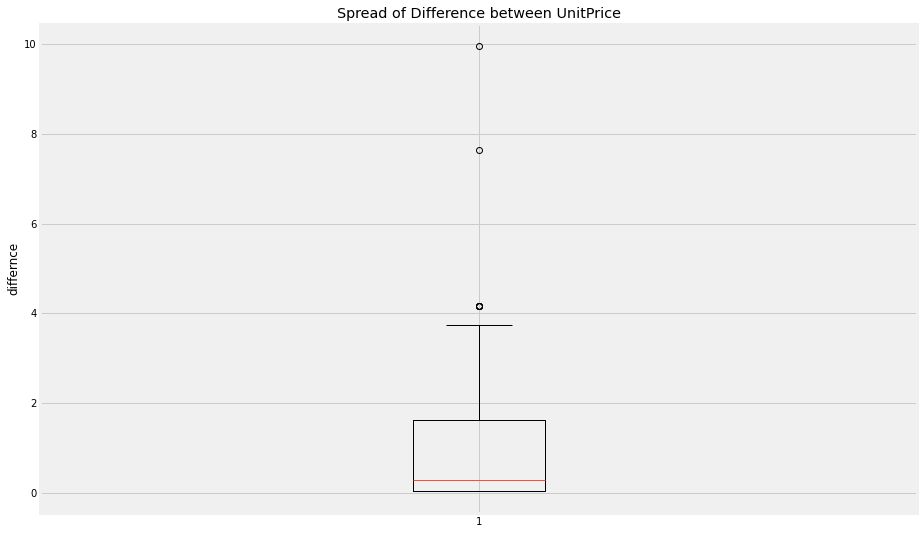

In [98]:
plt.figure(figsize=(14,9))
plt.boxplot(list_differencesInUnitPrices)
plt.title("Spread of Difference between UnitPrice")
plt.ylabel("differnce")

obs: the unit price values are not differeing much, it would be good if we take mean

do: take mean

In [99]:
for indexes in list_indexes_multipleStcodeEntries:
    group=df_WCO.loc[indexes,'UnitPrice']
    if group.nunique() > 1 :
        print("Before")
        display(group)
        mean=group.mean()
        print(mean)
        df_WCO.loc[indexes,'UnitPrice']=mean
        print("After")
        display(df_WCO.loc[indexes,'UnitPrice'])

Before


7582    3.39
7588    3.75
Name: UnitPrice, dtype: float64

3.5700000000000003
After


7582    3.57
7588    3.57
Name: UnitPrice, dtype: float64

Before


10157    2.10
10209    2.55
Name: UnitPrice, dtype: float64

2.325
After


10157    2.325
10209    2.325
Name: UnitPrice, dtype: float64

Before


21204    1.53
21206    1.65
Name: UnitPrice, dtype: float64

1.5899999999999999
After


21204    1.59
21206    1.59
Name: UnitPrice, dtype: float64

Before


22490    0.55
22491    0.42
Name: UnitPrice, dtype: float64

0.485
After


22490    0.485
22491    0.485
Name: UnitPrice, dtype: float64

Before


22492    0.55
22493    0.42
Name: UnitPrice, dtype: float64

0.485
After


22492    0.485
22493    0.485
Name: UnitPrice, dtype: float64

Before


22500    0.55
22501    0.42
Name: UnitPrice, dtype: float64

0.485
After


22500    0.485
22501    0.485
Name: UnitPrice, dtype: float64

Before


22502    0.55
22503    0.42
Name: UnitPrice, dtype: float64

0.485
After


22502    0.485
22503    0.485
Name: UnitPrice, dtype: float64

Before


23766    3.75
23806    3.39
Name: UnitPrice, dtype: float64

3.5700000000000003
After


23766    3.57
23806    3.57
Name: UnitPrice, dtype: float64

Before


58963    2.95
58967    2.55
Name: UnitPrice, dtype: float64

2.75
After


58963    2.75
58967    2.75
Name: UnitPrice, dtype: float64

Before


58964    2.95
58969    2.55
Name: UnitPrice, dtype: float64

2.75
After


58964    2.75
58969    2.75
Name: UnitPrice, dtype: float64

Before


58965    4.95
58966    4.25
Name: UnitPrice, dtype: float64

4.6
After


58965    4.6
58966    4.6
Name: UnitPrice, dtype: float64

Before


73032    3.75
73034    3.75
73036    3.39
Name: UnitPrice, dtype: float64

3.6300000000000003
After


73032    3.63
73034    3.63
73036    3.63
Name: UnitPrice, dtype: float64

Before


91253    0.00
91254    1.65
Name: UnitPrice, dtype: float64

0.825
After


91253    0.825
91254    0.825
Name: UnitPrice, dtype: float64

Before


95728    2.95
95729    0.00
Name: UnitPrice, dtype: float64

1.475
After


95728    1.475
95729    1.475
Name: UnitPrice, dtype: float64

Before


105376    7.65
105388    0.00
Name: UnitPrice, dtype: float64

3.825
After


105376    3.825
105388    3.825
Name: UnitPrice, dtype: float64

Before


130767    1.45
130769    1.65
Name: UnitPrice, dtype: float64

1.5499999999999998
After


130767    1.55
130769    1.55
Name: UnitPrice, dtype: float64

Before


131913    2.95
131925    2.55
Name: UnitPrice, dtype: float64

2.75
After


131913    2.75
131925    2.75
Name: UnitPrice, dtype: float64

Before


135150    1.45
135151    1.65
Name: UnitPrice, dtype: float64

1.5499999999999998
After


135150    1.55
135151    1.55
Name: UnitPrice, dtype: float64

Before


144987    4.95
144989    4.25
Name: UnitPrice, dtype: float64

4.6
After


144987    4.6
144989    4.6
Name: UnitPrice, dtype: float64

Before


151178    1.45
151179    1.65
Name: UnitPrice, dtype: float64

1.5499999999999998
After


151178    1.55
151179    1.55
Name: UnitPrice, dtype: float64

Before


158585    1.95
158587    1.65
Name: UnitPrice, dtype: float64

1.7999999999999998
After


158585    1.8
158587    1.8
Name: UnitPrice, dtype: float64

Before


159849    5.95
159850    4.95
Name: UnitPrice, dtype: float64

5.45
After


159849    5.45
159850    5.45
Name: UnitPrice, dtype: float64

Before


165781    14.95
165782    12.75
Name: UnitPrice, dtype: float64

13.85
After


165781    13.85
165782    13.85
Name: UnitPrice, dtype: float64

Before


172157    5.95
172158    5.45
Name: UnitPrice, dtype: float64

5.7
After


172157    5.7
172158    5.7
Name: UnitPrice, dtype: float64

Before


174235    2.95
174236    2.55
Name: UnitPrice, dtype: float64

2.75
After


174235    2.75
174236    2.75
Name: UnitPrice, dtype: float64

Before


195264    1.79
195265    2.08
Name: UnitPrice, dtype: float64

1.935
After


195264    1.935
195265    1.935
Name: UnitPrice, dtype: float64

Before


199808    0.36
199811    0.42
Name: UnitPrice, dtype: float64

0.39
After


199808    0.39
199811    0.39
Name: UnitPrice, dtype: float64

Before


228236    1.69
228237    1.45
Name: UnitPrice, dtype: float64

1.5699999999999998
After


228236    1.57
228237    1.57
Name: UnitPrice, dtype: float64

Before


235756    1.25
235762    1.06
Name: UnitPrice, dtype: float64

1.155
After


235756    1.155
235762    1.155
Name: UnitPrice, dtype: float64

Before


236719    3.75
236720    2.95
Name: UnitPrice, dtype: float64

3.35
After


236719    3.35
236720    3.35
Name: UnitPrice, dtype: float64

Before


241698    0.39
241699    0.32
Name: UnitPrice, dtype: float64

0.355
After


241698    0.355
241699    0.355
Name: UnitPrice, dtype: float64

Before


247108    1.63
247109    3.29
Name: UnitPrice, dtype: float64

2.46
After


247108    2.46
247109    2.46
Name: UnitPrice, dtype: float64

Before


247241    2.46
247242    2.50
Name: UnitPrice, dtype: float64

2.48
After


247241    2.48
247242    2.48
Name: UnitPrice, dtype: float64

Before


255191    2.46
255192    6.63
Name: UnitPrice, dtype: float64

4.545
After


255191    4.545
255192    4.545
Name: UnitPrice, dtype: float64

Before


255309    2.46
255310    2.50
Name: UnitPrice, dtype: float64

2.48
After


255309    2.48
255310    2.48
Name: UnitPrice, dtype: float64

Before


264275    3.29
264276    7.46
Name: UnitPrice, dtype: float64

5.375
After


264275    5.375
264276    5.375
Name: UnitPrice, dtype: float64

Before


264394    2.46
264395    2.50
Name: UnitPrice, dtype: float64

2.48
After


264394    2.48
264395    2.48
Name: UnitPrice, dtype: float64

Before


264396    2.46
264397    2.50
Name: UnitPrice, dtype: float64

2.48
After


264396    2.48
264397    2.48
Name: UnitPrice, dtype: float64

Before


264398    2.46
264399    2.50
Name: UnitPrice, dtype: float64

2.48
After


264398    2.48
264399    2.48
Name: UnitPrice, dtype: float64

Before


264400    2.46
264401    2.50
Name: UnitPrice, dtype: float64

2.48
After


264400    2.48
264401    2.48
Name: UnitPrice, dtype: float64

Before


277921    0.83
277922    2.46
Name: UnitPrice, dtype: float64

1.645
After


277921    1.645
277922    1.645
Name: UnitPrice, dtype: float64

Before


277974    1.25
277975    3.29
Name: UnitPrice, dtype: float64

2.27
After


277974    2.27
277975    2.27
Name: UnitPrice, dtype: float64

Before


278137    2.46
278138    2.50
Name: UnitPrice, dtype: float64

2.48
After


278137    2.48
278138    2.48
Name: UnitPrice, dtype: float64

Before


278145    2.46
278146    2.50
Name: UnitPrice, dtype: float64

2.48
After


278145    2.48
278146    2.48
Name: UnitPrice, dtype: float64

Before


278166    1.63
278167    3.29
Name: UnitPrice, dtype: float64

2.46
After


278166    2.46
278167    2.46
Name: UnitPrice, dtype: float64

Before


278223    0.83
278224    2.46
Name: UnitPrice, dtype: float64

1.645
After


278223    1.645
278224    1.645
Name: UnitPrice, dtype: float64

Before


280131    10.95
280132    12.75
Name: UnitPrice, dtype: float64

11.85
After


280131    11.85
280132    11.85
Name: UnitPrice, dtype: float64

Before


281864    2.55
281866    2.95
Name: UnitPrice, dtype: float64

2.75
After


281864    2.75
281866    2.75
Name: UnitPrice, dtype: float64

Before


287463    2.46
287464    2.50
Name: UnitPrice, dtype: float64

2.48
After


287463    2.48
287464    2.48
Name: UnitPrice, dtype: float64

Before


306730    12.75
306731    10.95
Name: UnitPrice, dtype: float64

11.85
After


306730    11.85
306731    11.85
Name: UnitPrice, dtype: float64

Before


310885    2.46
310886    2.50
Name: UnitPrice, dtype: float64

2.48
After


310885    2.48
310886    2.48
Name: UnitPrice, dtype: float64

Before


323893    3.75
323906    0.00
Name: UnitPrice, dtype: float64

1.875
After


323893    1.875
323906    1.875
Name: UnitPrice, dtype: float64

Before


326692    1.65
326693    1.45
Name: UnitPrice, dtype: float64

1.5499999999999998
After


326692    1.55
326693    1.55
Name: UnitPrice, dtype: float64

Before


329690    2.46
329691    2.50
Name: UnitPrice, dtype: float64

2.48
After


329690    2.48
329691    2.48
Name: UnitPrice, dtype: float64

Before


329693    2.46
329694    2.50
Name: UnitPrice, dtype: float64

2.48
After


329693    2.48
329694    2.48
Name: UnitPrice, dtype: float64

Before


338993    2.46
338994    2.50
Name: UnitPrice, dtype: float64

2.48
After


338993    2.48
338994    2.48
Name: UnitPrice, dtype: float64

Before


341628    1.25
341629    1.06
Name: UnitPrice, dtype: float64

1.155
After


341628    1.155
341629    1.155
Name: UnitPrice, dtype: float64

Before


348478    9.95
348497    0.00
Name: UnitPrice, dtype: float64

4.975
After


348478    4.975
348497    4.975
Name: UnitPrice, dtype: float64

Before


359271    2.46
359272    2.50
Name: UnitPrice, dtype: float64

2.48
After


359271    2.48
359272    2.48
Name: UnitPrice, dtype: float64

Before


359273    2.46
359274    2.50
Name: UnitPrice, dtype: float64

2.48
After


359273    2.48
359274    2.48
Name: UnitPrice, dtype: float64

Before


359276    2.46
359277    2.50
Name: UnitPrice, dtype: float64

2.48
After


359276    2.48
359277    2.48
Name: UnitPrice, dtype: float64

Before


361081    7.08
361084    8.25
Name: UnitPrice, dtype: float64

7.665
After


361081    7.665
361084    7.665
Name: UnitPrice, dtype: float64

Before


366451    1.69
366456    2.55
Name: UnitPrice, dtype: float64

2.12
After


366451    2.12
366456    2.12
Name: UnitPrice, dtype: float64

Before


369037    2.46
369038    6.63
Name: UnitPrice, dtype: float64

4.545
After


369037    4.545
369038    4.545
Name: UnitPrice, dtype: float64

Before


369230    2.46
369231    2.50
Name: UnitPrice, dtype: float64

2.48
After


369230    2.48
369231    2.48
Name: UnitPrice, dtype: float64

Before


369232    2.46
369233    2.50
Name: UnitPrice, dtype: float64

2.48
After


369232    2.48
369233    2.48
Name: UnitPrice, dtype: float64

Before


369235    2.46
369236    2.50
Name: UnitPrice, dtype: float64

2.48
After


369235    2.48
369236    2.48
Name: UnitPrice, dtype: float64

Before


369545    1.45
369550    1.65
Name: UnitPrice, dtype: float64

1.5499999999999998
After


369545    1.55
369550    1.55
Name: UnitPrice, dtype: float64

Before


383022    3.29
383023    7.46
Name: UnitPrice, dtype: float64

5.375
After


383022    5.375
383023    5.375
Name: UnitPrice, dtype: float64

Before


383104    2.46
383105    6.63
Name: UnitPrice, dtype: float64

4.545
After


383104    4.545
383105    4.545
Name: UnitPrice, dtype: float64

Before


383164    1.63
383165    4.13
Name: UnitPrice, dtype: float64

2.88
After


383164    2.88
383165    2.88
Name: UnitPrice, dtype: float64

Before


383291    2.46
383292    2.50
Name: UnitPrice, dtype: float64

2.48
After


383291    2.48
383292    2.48
Name: UnitPrice, dtype: float64

verify:

In [100]:
for indexes in list_indexes_multipleStcodeEntries:
    group=df_WCO.loc[indexes,'UnitPrice']
    if group.nunique() > 1 :
        print("failed")

do: add quantities to the 1st entry of all indexes, delete the remaining entries from the dataframe

reminder: 

`list_indexes_multipleStcodeEntries=[]
for indexes in grpby_df_WCO_custid_invn_stcode.groups.values():
    if df_WCO.loc[indexes].shape[0]>1:
        list_indexes_multipleStcodeEntries.append(indexes)`

In [101]:
df_WCO.shape

(391183, 8)

In [102]:
for indexes in list_indexes_multipleStcodeEntries:
    group=df_WCO.loc[indexes]
    sum_=df_WCO.loc[indexes,'Quantity'].sum()
    #print(sum_)
    df_WCO.loc[indexes[0],'Quantity']=sum_
    df_WCO.drop(indexes[1:],inplace=True)
    #print(group.shape[0])

In [105]:
df_WCO.shape

(386354, 8)

In [106]:
df_WCO.to_csv('pure_WithoutCancelledOrders.csv',index=False)

do: find "opposite" of rows of df_invnStartsWithC in df_WCO and update the quantity, find such indexes

info: 

opposite is defined as:

`cancelled['CustomerID']==Placed['CustomerID']` because cancelled order has to be placed by same customer 
 
`cancelled['StockCode']==Placed['StockCode']` because you cant cancel something which you havent ordered

`cancelled['InvoiceDate'] >= Placed['InvoiceDate']` because you cant cancle before ordering
 
 `-cancelled['Quantity'] <= Placed['Quantity']` because you cant cancel more than what you have ordered

In [107]:
df_CancelledOrders=pd.read_csv('pure_cancelledOrders.csv',\
                               parse_dates=['InvoiceDate'],\
                               dtype={'CustomerID':str})

df_PlacedOrders=pd.read_csv('pure_WithoutCancelledOrders.csv',\
                            parse_dates=['InvoiceDate'],\
                            dtype={'CustomerID':str,'InvoiceNo':str})

In [108]:
df_CancelledOrders.describe()

,Quantity,UnitPrice
count,8456.000000,8456.000000
mean,-31.651372,4.441862
std,1200.634970,9.221955
min,-80995.000000,0.030000
25%,-6.000000,1.450000
50%,-2.000000,2.550000
75%,-1.000000,4.950000
max,-1.000000,295.000000


In [109]:
df_PlacedOrders.describe()

,Quantity,UnitPrice
count,386354.000000,386354.000000
mean,13.344397,2.885944
std,183.043893,4.305577
min,1.000000,0.000000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,649.500000


In [110]:
df_CancelledOrders.shape

(8456, 8)

In [111]:
df_PlacedOrders.shape

(386354, 8)

In [112]:
df_CancelledOrders.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
1,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom


In [113]:
df_PlacedOrders.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [114]:
# Initialize the cancelled quantity
df_PlacedOrders['QuantityCancelled']=0

In [115]:
count=0
list_indexes_originalOrdersFound=[]
list_quantityToAdd=[]

for row in df_CancelledOrders.iterrows(): 
    
    filter_1= row[1]['CustomerID']==df_PlacedOrders['CustomerID']
    filter_2= row[1]['StockCode']==df_PlacedOrders['StockCode']
    filter_3= row[1]['InvoiceDate'] >= df_PlacedOrders['InvoiceDate']
    filter_4= -row[1]['Quantity'] <= df_PlacedOrders['Quantity']
    
    filter_mega=filter_1 & filter_2 & filter_3 & filter_4
    
    # if a required entry is found, this filter will have at least one True value
    
    if (filter_mega).sum() > 0:
        #display(df_PlacedOrders.loc[filter_mega])
        list_indexes_originalOrdersFound.append(df_PlacedOrders.loc[filter_mega].index)
        list_quantityToAdd.append(row[1]['Quantity'])
        #df_PlacedOrders.loc[filter_mega,'QuantityCancelled']=row[1]['Quantity']

In [116]:
len(list_indexes_originalOrdersFound)

7367

In [117]:
len(list_quantityToAdd)

7367

obs: there are at least 7367 entries whose some or all quantity are cancelled

why at least?
for one row in cancelledOrders we may find multiple purchase records(transactions) which are before the cancellation date, thats why list_indexes_originalOrdersFound is a list of lists.

In [118]:
list_quantityToAdd

[-6,
 -2,
 -1,
 -5,
 -1,
 -36,
 -1,
 -24,
 -1,
 -4,
 -10,
 -1,
 -4,
 -4,
 -4,
 -4,
 -6,
 -12,
 -4,
 -4,
 -4,
 -4,
 -6,
 -12,
 -72,
 -2,
 -1,
 -1,
 -1,
 -1,
 -1,
 -36,
 -12,
 -1,
 -1,
 -1,
 -3,
 -5,
 -3,
 -1,
 -6,
 -1,
 -2,
 -4,
 -2,
 -1,
 -1,
 -2,
 -1,
 -2,
 -2,
 -1,
 -1,
 -20,
 -3,
 -2,
 -1,
 -1,
 -24,
 -1,
 -1,
 -1,
 -1,
 -48,
 -12,
 -18,
 -6,
 -96,
 -1,
 -5,
 -4,
 -3,
 -6,
 -4,
 -48,
 -1,
 -6,
 -1,
 -1,
 -24,
 -1,
 -1,
 -1,
 -1,
 -1,
 -12,
 -1,
 -144,
 -2,
 -12,
 -1,
 -2,
 -33,
 -2,
 -48,
 -1,
 -1,
 -1,
 -1,
 -4,
 -1,
 -2,
 -1,
 -1,
 -3,
 -2,
 -1,
 -2,
 -1,
 -1,
 -24,
 -2,
 -1,
 -3,
 -1,
 -48,
 -4,
 -20,
 -1,
 -1,
 -1,
 -1,
 -1,
 -4,
 -4,
 -4,
 -2,
 -6,
 -2,
 -3,
 -12,
 -12,
 -12,
 -1,
 -3,
 -3,
 -4,
 -1,
 -1,
 -1,
 -4,
 -1,
 -4,
 -2,
 -6,
 -8,
 -1,
 -1,
 -5,
 -1,
 -12,
 -2,
 -1,
 -7,
 -3,
 -5,
 -1,
 -12,
 -10,
 -1,
 -2,
 -2,
 -10,
 -2,
 -7,
 -1,
 -1,
 -1,
 -2,
 -1,
 -1,
 -3,
 -6,
 -2,
 -12,
 -80,
 -80,
 -3,
 -8,
 -3,
 -12,
 -12,
 -300,
 -500,
 -1,
 -36,
 -36,
 -3,
 -6,
 -5,
 -1,
 -

do: add a column of quantities cancelled in the dataframe

In [119]:
for i,indexes in enumerate(list_indexes_originalOrdersFound):
    df_PlacedOrders.loc[indexes[0],'QuantityCancelled']=list_quantityToAdd[i]

In [120]:
df_PlacedOrders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0


In [121]:
df_PlacedOrders.describe()

,Quantity,UnitPrice,QuantityCancelled
count,386354.000000,386354.000000,386354.000000
mean,13.344397,2.885944,-0.626107
std,183.043893,4.305577,176.995031
min,1.000000,0.000000,-80995.000000
25%,2.000000,1.250000,0.000000
50%,6.000000,1.950000,0.000000
75%,12.000000,3.750000,0.000000
max,80995.000000,649.500000,0.000000


do: create a column for actual quantities

In [122]:
df_PlacedOrders['FinalQuantity']=df_PlacedOrders['Quantity']+df_PlacedOrders['QuantityCancelled']

In [123]:
df_PlacedOrders.loc[df_PlacedOrders['FinalQuantity']<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCancelled,FinalQuantity
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,-6,0
54,536373,21071,VINTAGE BILLBOARD DRINK ME MUG,6,2010-12-01 09:02:00,1.06,17850,United Kingdom,-6,0
136,536381,22778,GLASS CLOCHE SMALL,3,2010-12-01 09:41:00,3.95,15311,United Kingdom,-3,0
230,536390,85099B,JUMBO BAG RED RETROSPOT,100,2010-12-01 10:19:00,1.65,17511,United Kingdom,-100,0
299,536398,22114,HOT WATER BOTTLE TEA AND SYMPATHY,4,2010-12-01 10:52:00,3.95,13448,United Kingdom,-4,0
...,...,...,...,...,...,...,...,...,...,...
382724,581166,23494,VINTAGE DOILY DELUXE SEWING KIT,1,2011-12-07 14:43:00,5.95,15525,United Kingdom,-1,0
382750,581166,23079,TOADSTOOL BEDSIDE LIGHT,1,2011-12-07 14:43:00,8.95,15525,United Kingdom,-1,0
383834,581325,16169E,WRAP 50'S CHRISTMAS,100,2011-12-08 11:53:00,0.42,15877,United Kingdom,-100,0
383835,581325,22959,WRAP CHRISTMAS VILLAGE,25,2011-12-08 11:53:00,0.42,15877,United Kingdom,-25,0


In [124]:
df_PlacedOrders.describe()

,Quantity,UnitPrice,QuantityCancelled,FinalQuantity
count,386354.000000,386354.000000,386354.000000,386354.000000
mean,13.344397,2.885944,-0.626107,12.718289
std,183.043893,4.305577,176.995031,46.683754
min,1.000000,0.000000,-80995.000000,0.000000
25%,2.000000,1.250000,0.000000,2.000000
50%,6.000000,1.950000,0.000000,6.000000
75%,12.000000,3.750000,0.000000,12.000000
max,80995.000000,649.500000,0.000000,12540.000000


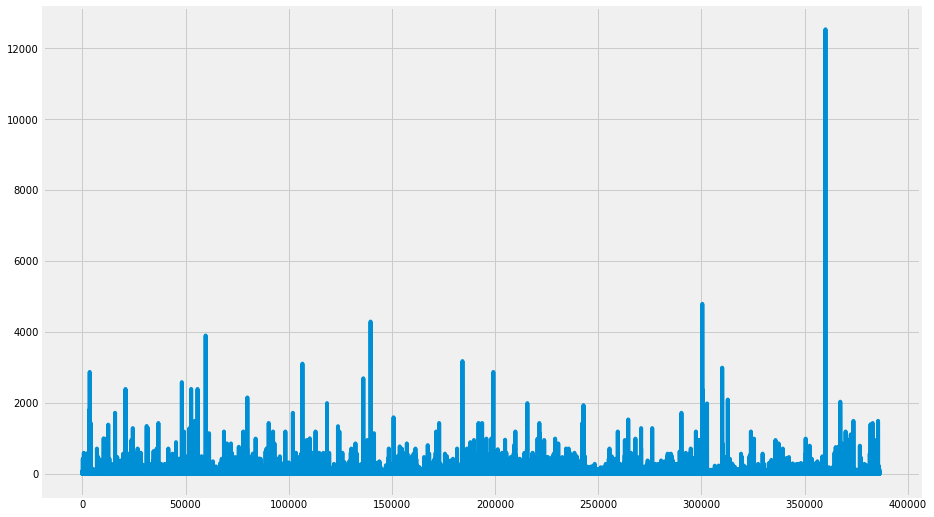

In [125]:
plt.figure(figsize=(14,9))
plt.plot(df_PlacedOrders['FinalQuantity'])

{'whiskers': [<matplotlib.lines.Line2D at 0x204301ffbb0>,
 'caps': [<matplotlib.lines.Line2D at 0x2043020b2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x204301ff850>],
 'medians': [<matplotlib.lines.Line2D at 0x2043020b970>],
 'fliers': [<matplotlib.lines.Line2D at 0x2043020bcd0>],
 'means': []}

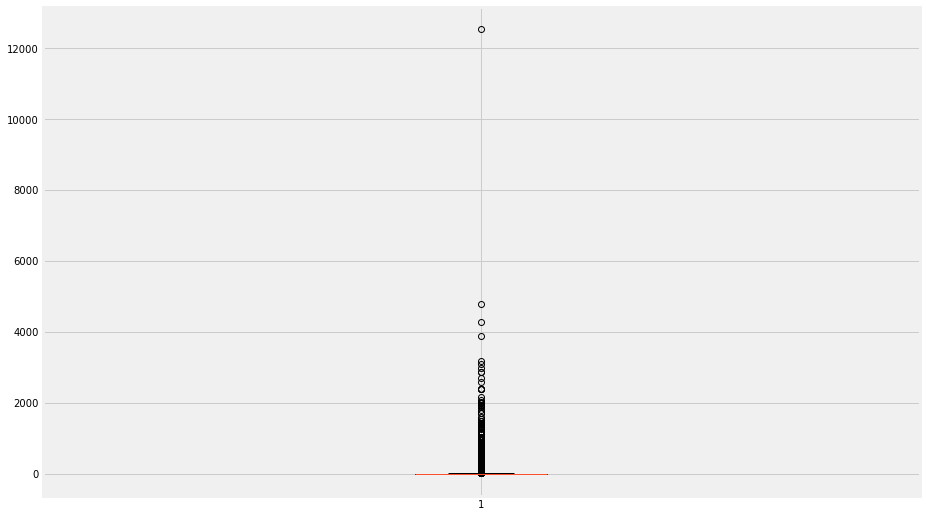

In [126]:
plt.figure(figsize=(14,9))
plt.boxplot(df_PlacedOrders['FinalQuantity'])

do: remove rows with unit price 0

In [127]:
df_modifiedPlacedOrder=df_PlacedOrders.drop(df_PlacedOrders.loc[df_PlacedOrders['UnitPrice']==0].index)

In [128]:
df_modifiedPlacedOrder.describe()

,Quantity,UnitPrice,QuantityCancelled,FinalQuantity
count,386326.000000,386326.000000,386326.000000,386326.000000
mean,13.309472,2.886153,-0.626153,12.683319
std,181.936445,4.305663,177.001445,42.105367
min,1.000000,0.040000,-80995.000000,0.000000
25%,2.000000,1.250000,0.000000,2.000000
50%,6.000000,1.950000,0.000000,6.000000
75%,12.000000,3.750000,0.000000,12.000000
max,80995.000000,649.500000,0.000000,4800.000000


In [129]:
df_modifiedPlacedOrder[df_modifiedPlacedOrder['FinalQuantity']==4800]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCancelled,FinalQuantity
300398,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901,United Kingdom,0,4800


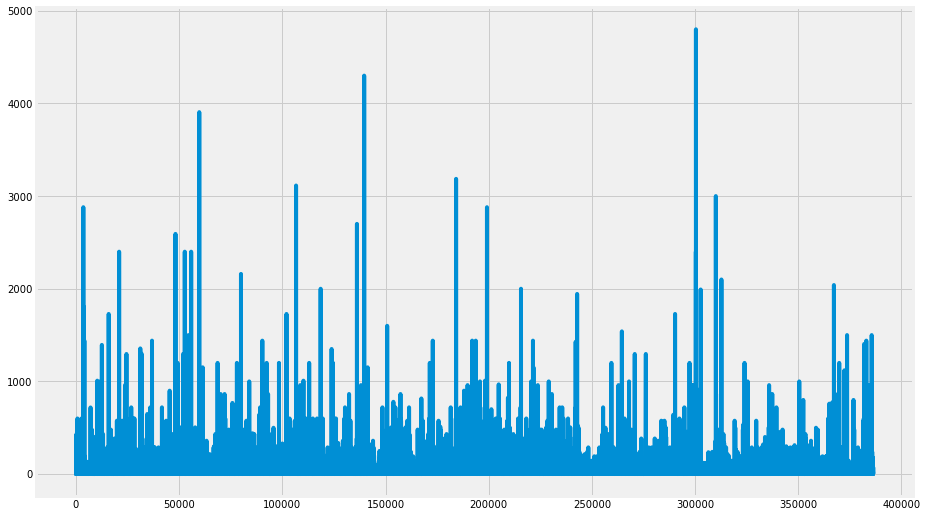

In [130]:
plt.figure(figsize=(14,9))
plt.plot(df_modifiedPlacedOrder['FinalQuantity'])

{'whiskers': [<matplotlib.lines.Line2D at 0x20430712760>,
 'caps': [<matplotlib.lines.Line2D at 0x20430712e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x20430712400>],
 'medians': [<matplotlib.lines.Line2D at 0x2043071e4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2043071e820>],
 'means': []}

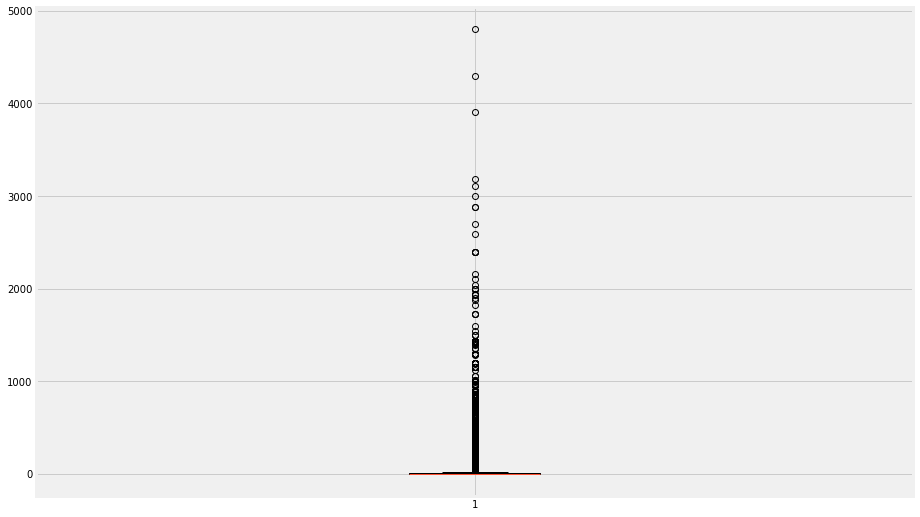

In [131]:
plt.figure(figsize=(14,9))
plt.boxplot(df_modifiedPlacedOrder['FinalQuantity'])

do: remove rows with 0 Final Quantity

In [132]:
df_modified_2_PlacedOrder=df_modifiedPlacedOrder.drop(df_modifiedPlacedOrder.loc[df_modifiedPlacedOrder['FinalQuantity']==0].index)

In [133]:
df_modified_2_PlacedOrder.describe()

,Quantity,UnitPrice,QuantityCancelled,FinalQuantity
count,383873.000000,383873.000000,383873.000000,383873.000000
mean,12.827292,2.867834,-0.062924,12.764367
std,42.484495,4.135378,2.985057,42.227435
min,1.000000,0.040000,-960.000000,1.000000
25%,2.000000,1.250000,0.000000,2.000000
50%,6.000000,1.950000,0.000000,6.000000
75%,12.000000,3.750000,0.000000,12.000000
max,4800.000000,649.500000,0.000000,4800.000000


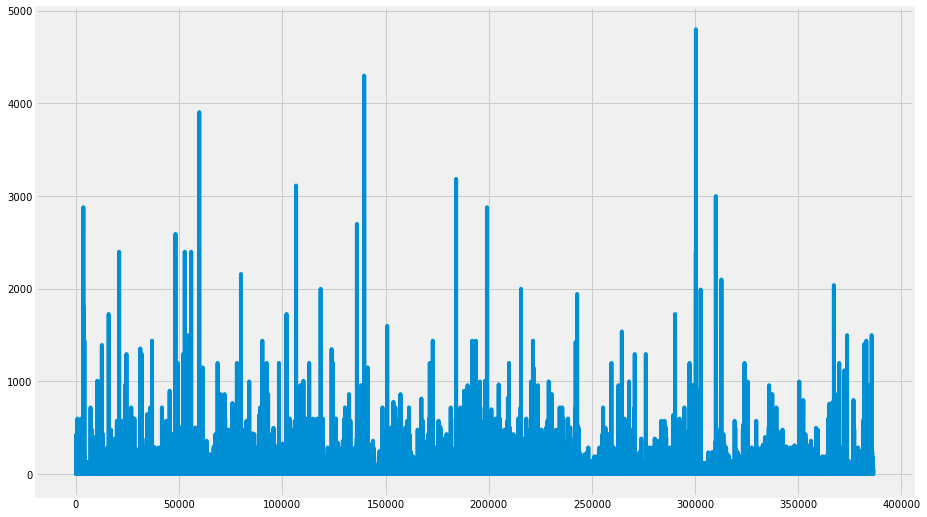

In [134]:
plt.figure(figsize=(14,9))
plt.plot(df_modified_2_PlacedOrder['FinalQuantity'])

{'whiskers': [<matplotlib.lines.Line2D at 0x204307c84c0>,
 'caps': [<matplotlib.lines.Line2D at 0x204307c8b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x204307c8160>],
 'medians': [<matplotlib.lines.Line2D at 0x204307d2250>],
 'fliers': [<matplotlib.lines.Line2D at 0x204307d2580>],
 'means': []}

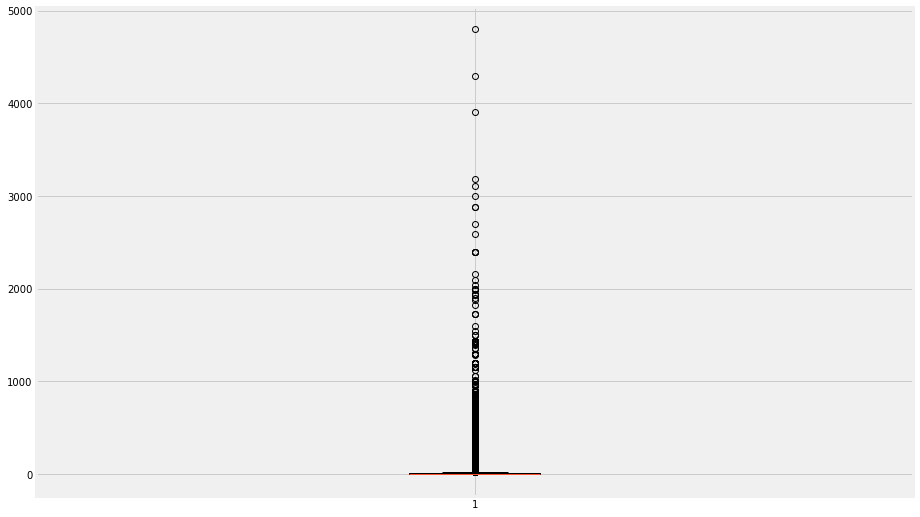

In [135]:
plt.figure(figsize=(14,9))
plt.boxplot(df_modified_2_PlacedOrder['FinalQuantity'])

do: save csv

In [136]:
df_modified_2_PlacedOrder.shape

(383873, 10)

In [137]:
df_modified_2_PlacedOrder.to_csv('pure_placedOrders.csv',index=False)

## Create basket price categories

In [138]:
df_pureOrders=pd.read_csv('pure_placedOrders.csv',\
                          parse_dates=['InvoiceDate'],\
                          dtype={'CustomerID':str,'InvoiceNo':str}).drop(['Quantity','QuantityCancelled'],axis=1)

In [139]:
df_pureOrders.head()

,InvoiceNo,StockCode,Description,InvoiceDate,UnitPrice,CustomerID,Country,FinalQuantity
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,2.55,17850,United Kingdom,6
1,536365,71053,WHITE METAL LANTERN,2010-12-01 08:26:00,3.39,17850,United Kingdom,6
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,2.75,17850,United Kingdom,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,3.39,17850,United Kingdom,6
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,3.39,17850,United Kingdom,6


In [140]:
df_pureOrders.describe(include='all')

,InvoiceNo,StockCode,Description,InvoiceDate,UnitPrice,CustomerID,Country,FinalQuantity
count,383873,383873,383873,383873,383873.000000,383873,383873,383873.000000
unique,18339,3645,3854,17111,NaN,4324,37,NaN
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2011-11-14 15:27:00,NaN,17841,United Kingdom,NaN
freq,540,1968,1961,540,NaN,7413,342085,NaN
first,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.867834,NaN,NaN,12.764367
std,NaN,NaN,NaN,NaN,4.135378,NaN,NaN,42.227435
min,NaN,NaN,NaN,NaN,0.040000,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,1.250000,NaN,NaN,2.000000


In [141]:
df_pureOrders.shape

(383873, 8)

do: create a column for total price

In [142]:
df_pureOrders['TotalPrice'] = df_pureOrders['UnitPrice'] * df_pureOrders['FinalQuantity']
df_pureOrders.sort_values('CustomerID')[:5]

,InvoiceNo,StockCode,Description,InvoiceDate,UnitPrice,CustomerID,Country,FinalQuantity,TotalPrice
148712,556201,23084,RABBIT NIGHT LIGHT,2011-06-09 13:01:00,2.08,12347,Iceland,12,24.96
95712,549222,22699,ROSES REGENCY TEACUP AND SAUCER,2011-04-07 10:43:00,2.95,12347,Iceland,6,17.70
95711,549222,22423,REGENCY CAKESTAND 3 TIER,2011-04-07 10:43:00,12.75,12347,Iceland,3,38.25
95710,549222,21041,RED RETROSPOT OVEN GLOVE DOUBLE,2011-04-07 10:43:00,2.95,12347,Iceland,6,17.70
95709,549222,21975,PACK OF 60 DINOSAUR CAKE CASES,2011-04-07 10:43:00,0.55,12347,Iceland,24,13.20


do: get basket price for each (custid, invnno)

do: take mean date for a transaction

In [143]:
temp = df_pureOrders.groupby(by=['CustomerID', 'InvoiceNo'],as_index=False)['TotalPrice'].sum()
df_basket_price = temp.rename(columns={'TotalPrice':'Basket Price'})
print(type(temp))
display(temp.head())

df_pureOrders['InvoiceDate_int'] = df_pureOrders['InvoiceDate'].astype('int64')
temp = df_pureOrders.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
display(temp.head())

df_pureOrders.drop('InvoiceDate_int', axis = 1, inplace = True)
df_basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])
display(df_basket_price.head(), df_basket_price.shape)

<class 'pandas.core.frame.DataFrame'>


,CustomerID,InvoiceNo,TotalPrice
0,12347,537626,711.79
1,12347,542237,475.39
2,12347,549222,636.25
3,12347,556201,382.52
4,12347,562032,584.91


,CustomerID,InvoiceNo,InvoiceDate_int
0,12347,537626,1291733820000001024
1,12347,542237,1296052199999999744
2,12347,549222,1302172979999999232
3,12347,556201,1307624460000000256
4,12347,562032,1312274880000000000


,CustomerID,InvoiceNo,Basket Price,InvoiceDate
0,12347,537626,711.79,2010-12-07 14:57:00.000001024
1,12347,542237,475.39,2011-01-26 14:29:59.999999744
2,12347,549222,636.25,2011-04-07 10:42:59.999999232
3,12347,556201,382.52,2011-06-09 13:01:00.000000256
4,12347,562032,584.91,2011-08-02 08:48:00.000000000


(18339, 4)

do: create baset range

In [144]:
df_basket_price.describe()['Basket Price']

count    18339.000000
mean       453.028710
std        954.273425
min          0.380000
25%        154.405000
50%        297.110000
75%        457.535000
max      38970.000000
Name: Basket Price, dtype: float64

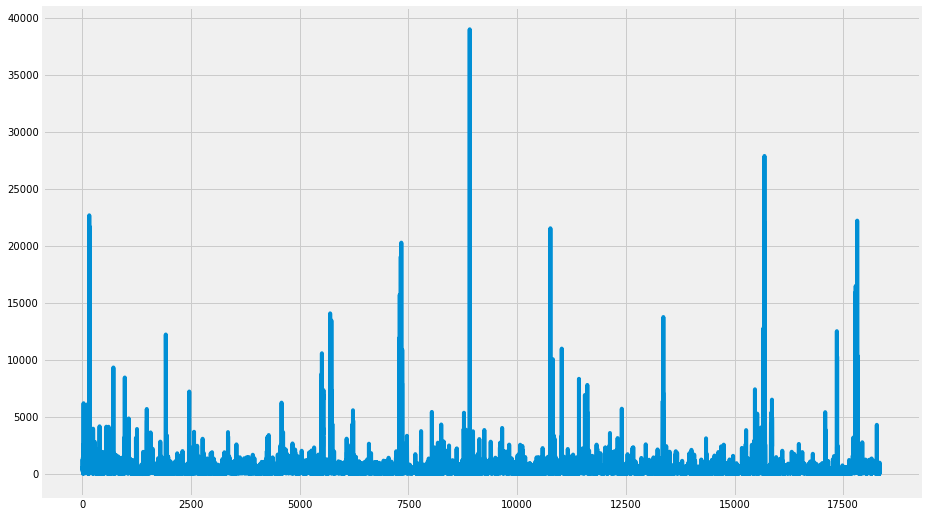

In [145]:
plt.figure(figsize=(14,9))
plt.plot(df_basket_price['Basket Price'])

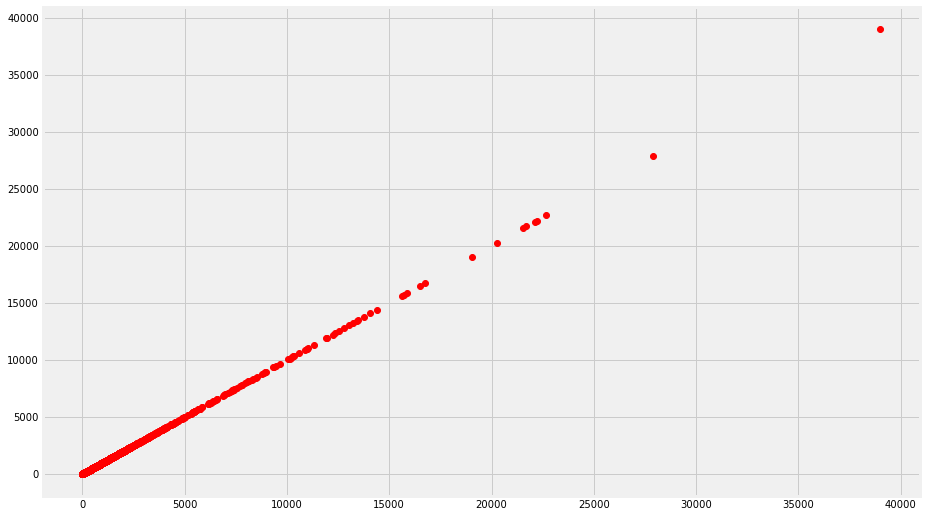

In [148]:
plt.figure(figsize=(14,9))
plt.scatter(df_basket_price['Basket Price'],df_basket_price['Basket Price'],c='red')

Text(0, 0.5, 'Basket Prices')

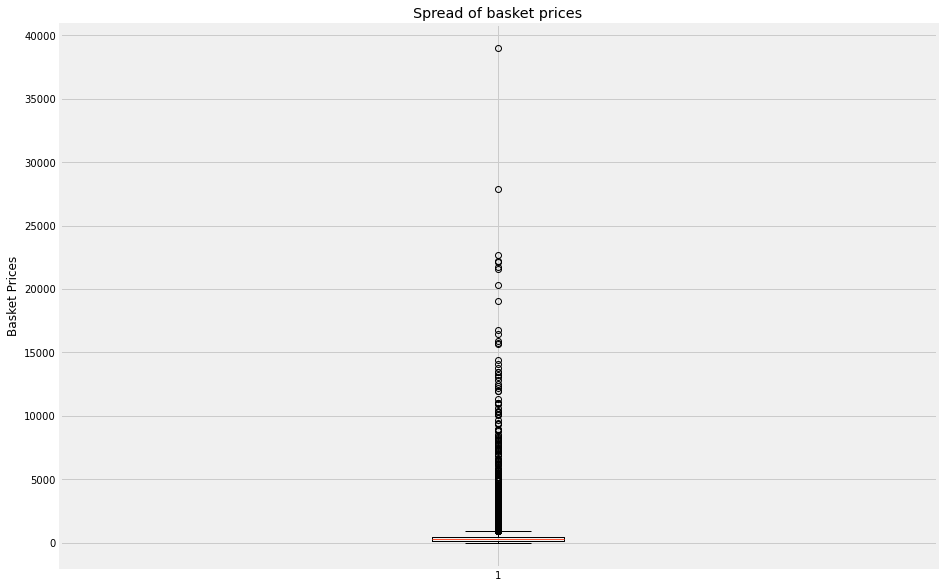

In [149]:
plt.figure(figsize=(14,10))
plt.boxplot(df_basket_price['Basket Price'])
plt.title("Spread of basket prices")
plt.ylabel("Basket Prices")

obs: basket prices are spread widely but are still calssifiable

In [150]:
des_basketPrice=df_basket_price['Basket Price'].describe()

In [151]:
des_basketPrice

count    18339.000000
mean       453.028710
std        954.273425
min          0.380000
25%        154.405000
50%        297.110000
75%        457.535000
max      38970.000000
Name: Basket Price, dtype: float64

In [152]:
Q3=des_basketPrice['50%']+(1.5*(des_basketPrice['75%']-des_basketPrice['25%']))
lim0=des_basketPrice['min']
lim1=des_basketPrice['25%']
lim2=des_basketPrice['50%']
lim3=des_basketPrice['75%']
lim4=Q3
lim5=des_basketPrice['max']

In [153]:
lim0=0
lim1=50
lim2=100
lim3=200
lim4=500
lim5=1000
lim6=5000
lim7=50000

In [154]:
def getBasketClass(x):
    '''
    ip: a number
    op: class of that number, in which category it belongs
    '''      
    if lim0 <= x <= lim1:
        return 0
    if lim1 <= x <= lim2:
        return 1
    if lim2 <= x <= lim3:
        return 2
    if lim3 <= x <= lim4:
        return 3
    if lim4 <= x <= lim5:
        return 4
    if lim5 <= x <= lim6:
        return 5
    if lim6 <= x <= lim7:
        return 6

In [155]:
print(getBasketClass(500))

3


In [156]:
df_basket_price['class']=[getBasketClass(x) for x in df_basket_price['Basket Price']]

In [157]:
df_basket_price.groupby('class').count()

,CustomerID,InvoiceNo,Basket Price,InvoiceDate
class,,,,
0,1113,1113,1113,1113
1,1100,1100,1100,1100
2,4036,4036,4036,4036
3,8085,8085,8085,8085
4,2784,2784,2784,2784
5,1113,1113,1113,1113
6,108,108,108,108


TODO: draw: pie chart

# uniformity in stockcodes and descriptions

In [158]:
df_pureOrders=pd.read_csv('pure_placedOrders.csv',\
                          parse_dates=['InvoiceDate'],\
                          dtype={'CustomerID':str,'InvoiceNo':str}).drop(['Quantity','QuantityCancelled'],axis=1)

In [159]:
df_pureOrders.nunique().filter(['StockCode','Description'])

StockCode      3645
Description    3854
dtype: int64

## create a Matrix for each unique description having column as words

### pre processing

In [160]:
is_noun = lambda pos: pos[:2] == 'NN'

def keywords_inventory(dataframe, column = 'Description'):
    '''
    ip: A dataframe and a column name
    
    op: category_keys, keywords_roots, keywords_select, count_keywords
        category_keys: list of words in the discription which are understandable version of their root word
        keywords_roots: {root word <-> {associated words}}
        keywords_select: {root <-> keyword}
            this keyword is obtained by applying minimum length
        count_keywords: {root word <-> number of words from the description which derive this root word}
    '''
    
    # ititialize a stemmer
    stemmer = nltk.stem.SnowballStemmer("english")
    
    # collect the words / root
    # Association:: root word <-> {associated words}
    keywords_roots  = dict()  
    
    # this counts the root words
    # basically its key : len(value) where key, value is taken from keywords_roots
    # Association:: root word <-> number of words from the description which derive this root word
    count_keywords  = dict()
    
    # Association:: root <-> keyword
    # this keyword is from the token for descriptions
    # root word need not always make sense, we have to have a word which means something in the descriptions
    # this "keyword" is the shortest word amidst values corresponding to each key in keywords_roots
    # e.g. in keyword_select key='wateri' value='watery'
    # 'wateri' dosent mean anything, its a stemmed word
    # but 'watery' means something and its taken from the description
    keywords_select = dict()  
    
    # these are the values from keyword_select
    # each element in this is in some description
    category_keys   = []
    
    
    for s in dataframe[column]:
        #print(s)
        if pd.isnull(s): continue
            
        # lower the line
        lines = s.lower()
        
        # tokenize the line
        tokenized = nltk.word_tokenize(lines)
        
        # get (word, part of speech)
        # nouns list is a list of words in the line which are nouns 
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
        #print("nouns found: ",nouns)
        
        for t in nouns:
            t = t.lower()
            
            # root word (stemmed)
            root = stemmer.stem(t)
            
            # if the root word is already there in the dictionary
                # add the original word in the set of value in {key=root word, value= set of words that derive this root word}
                # and add the count in the values section of the dict count_keywords
                
            # if the root word is not there in the dictionary
                # create a key value pair as {key=this root word, value=this origianl word which derived it}
                # initiate the count as 1 in the values section of the dict count_keywords
            if root in keywords_roots:                
                keywords_roots[root].add(t)
                count_keywords[root] += 1                
            else:
                keywords_roots[root] = {t}
                count_keywords[root] = 1
    
    
    for s in keywords_roots.keys():
        #print("for a root word: ",s)
        
        # if multiple words have this s as root then 
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                #print("word that derived it: ",k)
                
                # If multiple words are coming from one root, then
                # there exists a word with minimum length such that all other words are just additions of letters to this word
                # This whole min length business is to find the least lenth element from the words that had the given root
                if len(k) < min_length:
                    clef = k 
                    min_length = len(k)            
            
            # now that this minimal length word is selected, add it to the list of category keys
            category_keys.append(clef)
            
            # add this word as value to the key being the root word
            keywords_select[s] = clef
        else:
            # else means there is only one word associated with the root in keywords_roots
            # now here there is no need to go for minimum length
            # henve just select the first word from the values
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
                   
    
    #print("")
    #print("keywords_roots:\n")
    #pprint.pprint(keywords_roots)
    #print("")
    #print("keywords_select:\n")
    #pprint.pprint(keywords_select)
    #print("")
    #print("category keys:\n")
    #pprint.pprint(category_keys)
    #print("")
    #print("count_keywords\n")
    #pprint.pprint(count_keywords)
    #print("")
    
    return category_keys, keywords_roots, keywords_select, count_keywords

In [161]:
df_descriptions = pd.DataFrame(df_pureOrders['Description'].unique()).rename(columns = {0:'Description'})
df_descriptions.head(5)

,Description
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.


In [162]:
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_descriptions)
print(keywords_inventory.__doc__)


    ip: A dataframe and a column name
    
    op: category_keys, keywords_roots, keywords_select, count_keywords
        category_keys: list of words in the discription which are understandable version of their root word
        keywords_roots: {root word <-> {associated words}}
        keywords_select: {root <-> keyword}
            this keyword is obtained by applying minimum length
        count_keywords: {root word <-> number of words from the description which derive this root word}
    


In [163]:
pprint.pprint(keywords)

['heart',
 'holder',
 'metal',
 'lantern',
 'cream',
 'cupid',
 'coat',
 'hanger',
 'union',
 'flag',
 'water',
 'bottle',
 'nest',
 'box',
 'glass',
 'star',
 'hand',
 'jack',
 'bird',
 'ornament',
 'poppy',
 'playhouse',
 'bedroom',
 'kitchen',
 'feltcraft',
 'princess',
 'charlotte',
 'doll',
 'ivory',
 'cosy',
 'colour',
 'teaspoons',
 'vintage',
 'jigsaw',
 'block',
 'alphabet',
 'home',
 'building',
 'word',
 'love',
 'recipe',
 'england',
 'jam',
 'jar',
 'rack',
 'paris',
 'fashion',
 'bath',
 'alarm',
 'clock',
 'bakelike',
 'pink',
 'green',
 'panda',
 'bunny',
 'sheet',
 'tape',
 'globe',
 'head',
 'tail',
 'game',
 'set/2',
 'retrospot',
 'tea',
 'towel',
 'round',
 'snack',
 'woodland',
 'spaceboy',
 'lunch',
 'i',
 'london',
 'circus',
 'bag',
 'design',
 'toadstool',
 'night',
 'light',
 'seaside',
 'puzzles',
 'mini',
 'parade',
 'paint',
 'paper',
 'chain',
 'christmas',
 'warmer',
 'dot',
 'parasol',
 'coffee',
 'mug',
 'planet',
 'billboard',
 'love/hate',
 'wood',
 

In [164]:
pprint.pprint(keywords_roots)

{'+': {'+'},
 '/': {'/'},
 'a5': {'a5'},
 'acapulco': {'acapulco'},
 'account': {'account'},
 'acryl': {'acrylic'},
 'address': {'address'},
 'adult': {'adult'},
 'advent': {'advent'},
 'ahoy': {'ahoy'},
 'aid': {'aid'},
 'air': {'air'},
 'airlin': {'airline'},
 'airmail': {'airmail'},
 'alarm': {'alarm'},
 'album': {'album'},
 'allium': {'allium'},
 'alphabet': {'alphabet'},
 'aluminium': {'aluminium'},
 'amber': {'amber'},
 'ameli': {'amelie'},
 'amethyst': {'amethyst'},
 'anemon': {'anemone'},
 'angel': {'angels', 'angel'},
 'anim': {'animals', 'animal'},
 'antiqu': {'antique'},
 'antoienett': {'antoienett'},
 'antoinett': {'antoinette'},
 'aperitif': {'aperitif'},
 'appl': {'apples', 'apple'},
 'apron': {'apron'},
 'area': {'area'},
 'armi': {'army'},
 'art': {'art'},
 'artifici': {'artificial'},
 'ashtray': {'ashtray'},
 'ass': {'ass'},
 'asst': {'asst'},
 'asstd': {'asstd'},
 'b': {'b'},
 "b'draw": {"b'draw"},
 "b'fli": {"b'fly"},
 'babi': {'baby'},
 'babushka': {'babushka'},
 'b

 'mod': {'mod'},
 'model': {'modelling'},
 'modern': {'modern'},
 'money': {'money'},
 'monkey': {'monkey'},
 'monochrom': {'monochrome'},
 'monsoon': {'monsoon'},
 'monster': {'monster', 'monsters'},
 'mont': {'monte'},
 'montan': {'montan'},
 'montana': {'montana'},
 'moodi': {'moody'},
 'moon': {'moon'},
 'mop': {'mop'},
 'morri': {'morris'},
 'mosaic': {'mosaic'},
 'mother': {'mother'},
 'motorbik': {'motorbike'},
 'mould': {'moulds', 'mould'},
 'mous': {'mouse'},
 'mousey': {'mousey'},
 'mr': {'mr'},
 'mrs': {'mrs'},
 'muff': {'muff'},
 'mug': {'mugs', 'mug'},
 'multi': {'multi'},
 'multicol': {'multicol'},
 'multicolour': {'multicolour'},
 'mum': {'mum'},
 'mummi': {'mummy'},
 'murano': {'murano'},
 'mushroom': {'mushrooms', 'mushroom'},
 'n': {'n'},
 'namast': {'namaste'},
 'nanci': {'nancy'},
 'napkin': {'napkins'},
 'nativ': {'nativity'},
 'natur': {'nature'},
 'naught': {'naughts'},
 'naughti': {'naughty'},
 'neckl': {'neckl'},
 'neckl.36': {'neckl.36'},
 'neckl36': {'neckl36

In [165]:
pprint.pprint(keywords_select)

{'+': '+',
 '/': '/',
 'a5': 'a5',
 'acapulco': 'acapulco',
 'account': 'account',
 'acryl': 'acrylic',
 'address': 'address',
 'adult': 'adult',
 'advent': 'advent',
 'ahoy': 'ahoy',
 'aid': 'aid',
 'air': 'air',
 'airlin': 'airline',
 'airmail': 'airmail',
 'alarm': 'alarm',
 'album': 'album',
 'allium': 'allium',
 'alphabet': 'alphabet',
 'aluminium': 'aluminium',
 'amber': 'amber',
 'ameli': 'amelie',
 'amethyst': 'amethyst',
 'anemon': 'anemone',
 'angel': 'angel',
 'anim': 'animal',
 'antiqu': 'antique',
 'antoienett': 'antoienett',
 'antoinett': 'antoinette',
 'aperitif': 'aperitif',
 'appl': 'apple',
 'apron': 'apron',
 'area': 'area',
 'armi': 'army',
 'art': 'art',
 'artifici': 'artificial',
 'ashtray': 'ashtray',
 'ass': 'ass',
 'asst': 'asst',
 'asstd': 'asstd',
 'b': 'b',
 "b'draw": "b'draw",
 "b'fli": "b'fly",
 'babi': 'baby',
 'babushka': 'babushka',
 'back': 'back',
 'backpack': 'backpack',
 'badg': 'badges',
 'bag': 'bag',
 'bain': 'bain',
 'bake': 'bake',
 'bakelik': 

 'mirror': 'mirror',
 'mitten': 'mittens',
 'mix': 'mixing',
 'mobil': 'mobile',
 'mock': 'mock',
 'mod': 'mod',
 'model': 'modelling',
 'modern': 'modern',
 'money': 'money',
 'monkey': 'monkey',
 'monochrom': 'monochrome',
 'monsoon': 'monsoon',
 'monster': 'monster',
 'mont': 'monte',
 'montan': 'montan',
 'montana': 'montana',
 'moodi': 'moody',
 'moon': 'moon',
 'mop': 'mop',
 'morri': 'morris',
 'mosaic': 'mosaic',
 'mother': 'mother',
 'motorbik': 'motorbike',
 'mould': 'mould',
 'mous': 'mouse',
 'mousey': 'mousey',
 'mr': 'mr',
 'mrs': 'mrs',
 'muff': 'muff',
 'mug': 'mug',
 'multi': 'multi',
 'multicol': 'multicol',
 'multicolour': 'multicolour',
 'mum': 'mum',
 'mummi': 'mummy',
 'murano': 'murano',
 'mushroom': 'mushroom',
 'n': 'n',
 'namast': 'namaste',
 'nanci': 'nancy',
 'napkin': 'napkins',
 'nativ': 'nativity',
 'natur': 'nature',
 'naught': 'naughts',
 'naughti': 'naughty',
 'neckl': 'neckl',
 'neckl.36': 'neckl.36',
 'neckl36': 'neckl36',
 'necklac': 'necklac',
 'ne

In [166]:
pprint.pprint(count_keywords)

{'+': 12,
 '/': 1,
 'a5': 1,
 'acapulco': 6,
 'account': 1,
 'acryl': 2,
 'address': 1,
 'adult': 1,
 'advent': 4,
 'ahoy': 2,
 'aid': 1,
 'air': 1,
 'airlin': 6,
 'airmail': 1,
 'alarm': 7,
 'album': 4,
 'allium': 1,
 'alphabet': 13,
 'aluminium': 1,
 'amber': 1,
 'ameli': 1,
 'amethyst': 9,
 'anemon': 1,
 'angel': 5,
 'anim': 10,
 'antiqu': 22,
 'antoienett': 1,
 'antoinett': 2,
 'aperitif': 2,
 'appl': 21,
 'apron': 9,
 'area': 2,
 'armi': 2,
 'art': 75,
 'artifici': 1,
 'ashtray': 4,
 'ass': 7,
 'asst': 2,
 'asstd': 2,
 'b': 2,
 "b'draw": 1,
 "b'fli": 5,
 'babi': 9,
 'babushka': 22,
 'back': 1,
 'backpack': 5,
 'badg': 5,
 'bag': 163,
 'bain': 1,
 'bake': 7,
 'bakelik': 4,
 'baker': 1,
 'ball': 18,
 'balloon': 10,
 'balm': 1,
 'bamboo': 2,
 'band': 2,
 'bangl': 4,
 'bank': 7,
 'banner': 1,
 'banquet': 1,
 'bar': 2,
 'barn': 1,
 'baroqu': 22,
 'baroquecandlestick': 1,
 'barrel': 1,
 'barrier': 2,
 'base': 5,
 'basebal': 2,
 'basil': 2,
 'basin': 1,
 'basket': 25,
 'bath': 8,
 'bathr

 'meadow': 1,
 'measur': 7,
 'medicin': 1,
 'medina': 6,
 'medium': 15,
 'melamin': 1,
 'memo': 3,
 'memoboard': 1,
 'memori': 2,
 'merri': 2,
 'messag': 1,
 'metal': 99,
 'meter': 1,
 'metr': 1,
 'mice': 1,
 'microwav': 3,
 'mid': 1,
 'midnight': 7,
 'milk': 13,
 'milkshak': 1,
 'mini': 56,
 'miniatur': 1,
 'minitur': 1,
 'mint': 8,
 'miror': 1,
 'mirror': 50,
 'mitten': 1,
 'mix': 1,
 'mobil': 6,
 'mock': 1,
 'mod': 1,
 'model': 1,
 'modern': 1,
 'money': 15,
 'monkey': 8,
 'monochrom': 1,
 'monsoon': 1,
 'monster': 6,
 'mont': 2,
 'montan': 1,
 'montana': 3,
 'moodi': 2,
 'moon': 3,
 'mop': 1,
 'morri': 9,
 'mosaic': 3,
 'mother': 1,
 'motorbik': 1,
 'mould': 4,
 'mous': 3,
 'mousey': 1,
 'mr': 1,
 'mrs': 1,
 'muff': 3,
 'mug': 66,
 'multi': 3,
 'multicol': 1,
 'multicolour': 8,
 'mum': 3,
 'mummi': 1,
 'murano': 9,
 'mushroom': 7,
 'n': 1,
 'namast': 1,
 'nanci': 1,
 'napkin': 10,
 'nativ': 1,
 'natur': 2,
 'naught': 1,
 'naughti': 1,
 'neckl': 4,
 'neckl.36': 3,
 'neckl36': 2,
 'n

### filter words

obs: some colors are useless words like "w","set","+","/","a5","b" are appearing

do: remove them, create a filter

In [167]:
# its  a list of lists containing word and its occurance 
list_products = []
for k,v in count_keywords.items():
    word = keywords_select[k]
    
    # filter 1: word is not in the following list
    if word in ['pink', 'blue', 'tag', 'green', 'orange', 'set']: continue
    
    # filter 2: length of the word is less than 3 or the word occurs less than 13 times
    if len(word) < 3 : continue
    
    # filter 3: the word is + or /
    if ('+' in word) or ('/' in word): continue
    
    list_products.append([word, v])

list_products.sort(key = lambda x:x[1], reverse = True)
print('length:', len(list_products))
print(list_products)

length: 1357
[['heart', 267], ['vintage', 210], ['bag', 163], ['box', 153], ['glass', 147], ['christmas', 137], ['design', 128], ['candle', 121], ['holder', 120], ['flower', 119], ['decorative', 108], ['metal', 99], ['retrospot', 90], ['card', 90], ['necklac', 85], ['paper', 83], ['art', 75], ['silver', 72], ['polkadot', 68], ['cake', 68], ['cover', 67], ['mug', 66], ['tin', 66], ['wrap', 65], ['sign', 64], ['pack', 61], ['egg', 61], ['bracelet', 61], ['star', 59], ['bowl', 57], ['mini', 56], ['wall', 55], ['tea', 54], ['garden', 54], ['ivory', 53], ['cushion', 53], ['frame', 52], ['mirror', 50], ['home', 49], ['gift', 48], ['cream', 46], ['ring', 46], ['earrings', 46], ['bird', 45], ['bottle', 44], ['clock', 44], ['paisley', 42], ['letter', 42], ['party', 42], ['wood', 40], ['ribbon', 40], ['charm', 40], ['jar', 39], ['easter', 39], ['garland', 38], ['hook', 38], ['gold', 38], ['bead', 38], ['drawer', 37], ['cup', 37], ['zinc', 37], ['water', 36], ['photo', 36], ['bell', 36], ['pencil

### creation of X

do: for all unique description, create a pivoted table

to know what are the words which define descriptions

In [175]:
list_Descriptions = df_pureOrders['Description'].unique()
X = pd.DataFrame()
for key, occurence in list_products:
    # take each line (x) from list of unique descriptions
    # see of the key in the for loop is in that x or not
    # take int() of the boolean result (i.e. 0 or 1)
    # atach that vertical list as a column in x for each key
    X.loc[:, key] = list(   map(  lambda x:int(key.upper() in x.upper()), list_Descriptions  )    )

In [176]:
X.head(3)

,heart,vintage,bag,box,glass,christmas,design,candle,holder,flower,...,naughts,blueberry,fondant,chrome,sil't,squ,crome,czech,puncture,country
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
X.shape

(3854, 1357)

do: create a dataframe one column as description and all other columns as columns of X

In [178]:
df_ExplainDescription=pd.concat([pd.DataFrame(df_descriptions),X],axis=1)
df_ExplainDescription.head(3)

,Description,heart,vintage,bag,box,glass,christmas,design,candle,holder,...,naughts,blueberry,fondant,chrome,sil't,squ,crome,czech,puncture,country
0,WHITE HANGING HEART T-LIGHT HOLDER,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,WHITE METAL LANTERN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CREAM CUPID HEARTS COAT HANGER,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


check: all descriptions are getting explained by these keywords

In [179]:
# how many words it took to explain
X.sum(axis=1)

0        9
1        2
2        9
3        4
4        5
        ..
3849     4
3850     4
3851     4
3852     5
3853    11
Length: 3854, dtype: int64

In [180]:
# number of descriptions not getting explained
(X.sum(axis=1)==0).sum()

0

In [181]:
# list of descriptions not getting eplained
list_Descriptions[(X.sum(axis=1)==0)]

array([], dtype=object)

check answer: no description is left behind

every description is getting explained by 1357 words

### WordCount

In [182]:
list_WordCount = []
for k,v in count_keywords.items():
    if k in list(X.columns):
        list_WordCount.append([keywords_select[k],v])
list_WordCount.sort(key = lambda x:x[1], reverse = True)

In [183]:
list_WordCount

[['heart', 267],
 ['bag', 163],
 ['box', 153],
 ['glass', 147],
 ['design', 128],
 ['holder', 120],
 ['flower', 119],
 ['metal', 99],
 ['retrospot', 90],
 ['card', 90],
 ['necklac', 85],
 ['paper', 83],
 ['art', 75],
 ['silver', 72],
 ['polkadot', 68],
 ['cake', 68],
 ['cover', 67],
 ['mug', 66],
 ['tin', 66],
 ['wrap', 65],
 ['sign', 64],
 ['pack', 61],
 ['egg', 61],
 ['bracelet', 61],
 ['star', 59],
 ['bowl', 57],
 ['mini', 56],
 ['wall', 55],
 ['tea', 54],
 ['garden', 54],
 ['cushion', 53],
 ['frame', 52],
 ['mirror', 50],
 ['home', 49],
 ['gift', 48],
 ['cream', 46],
 ['ring', 46],
 ['bird', 45],
 ['clock', 44],
 ['paisley', 42],
 ['letter', 42],
 ['wood', 40],
 ['ribbon', 40],
 ['charm', 40],
 ['jar', 39],
 ['easter', 39],
 ['garland', 38],
 ['hook', 38],
 ['gold', 38],
 ['bead', 38],
 ['drawer', 37],
 ['cup', 37],
 ['zinc', 37],
 ['water', 36],
 ['photo', 36],
 ['bell', 36],
 ['pencil', 35],
 ['plate', 34],
 ['skull', 34],
 ['tray', 34],
 ['spot', 33],
 ['children', 32],
 ['case'

visualize first 125 words

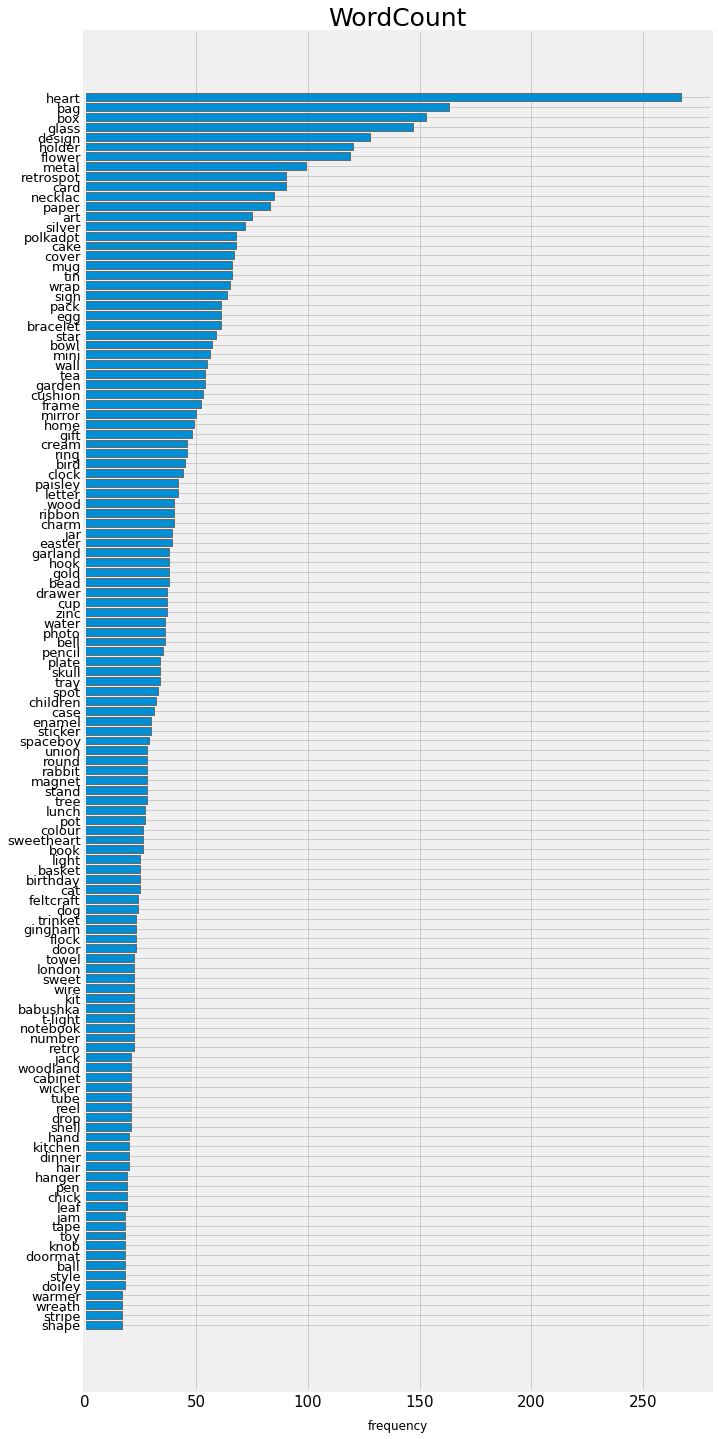

In [184]:
plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(10, 25))
#plt.figure(figsize=(10,25))

y_axis = [i[1] for i in list_WordCount[:125]]
x_axis = [k for k,i in enumerate(list_WordCount[:125])]


plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
x_label = [i[0] for i in list_WordCount[:125]]
plt.yticks(x_axis, x_label)


plt.xlabel("frequency", fontsize = 12, labelpad = 10)

plt.barh(x_axis, y_axis, align = 'center')
ax = plt.gca()
ax.invert_yaxis()
plt.title("WordCount", color='k',fontsize = 25)
plt.show()

## stockcodes and descriptions

check: a StockCode is having unique description or not

In [185]:
df_pureOrders.nunique().filter(['Description','StockCode'])

Description    3854
StockCode      3645
dtype: int64

In [186]:
X.shape, df_descriptions.shape, df_ExplainDescription.shape

((3854, 1357), (3854, 1), (3854, 1358))

check answer: some stockcodes are having multiple descriptions

check: by how much these descriptions are differing

In [187]:
grpby_df_pureProducts_StockCode=df_pureOrders.groupby('StockCode')

reminder: we have a dataframe called df_ExplainDescription which contains tokenized processed descriptions

In [188]:
df_ExplainDescription.head(1)

,Description,heart,vintage,bag,box,glass,christmas,design,candle,holder,...,naughts,blueberry,fondant,chrome,sil't,squ,crome,czech,puncture,country
0,WHITE HANGING HEART T-LIGHT HOLDER,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [189]:
# whats the maximum number of different descriptions a stockCode is having?
max(grpby_df_pureProducts_StockCode.nunique()['Description'])

4

obs: there is a stockcode with 4 different descriptions

do: make a list of lists of differeing descriptions but having smae stockCode

In [190]:
list_differentDescriptions=[]

for indexes in grpby_df_pureProducts_StockCode.groups.values():
    if df_pureOrders.loc[indexes,'Description'].nunique()>1:
        list_differentDescriptions.append(df_pureOrders.loc[indexes,'Description'].unique())

In [191]:
list_differentDescriptions

[array(['WRAP, CAROUSEL', 'WRAP CAROUSEL'], dtype=object),
 array(["FLOWER FAIRY,5 SUMMER B'DRAW LINERS",
        'FLOWER FAIRY 5 DRAWER LINERS',
        'FLOWER FAIRY 5 SUMMER DRAW LINERS'], dtype=object),
 array(['VIPPASSPORT COVER ', 'VIP PASSPORT COVER '], dtype=object),
 array(['LUNCH BAG RED RETROSPOT', 'LUNCH BAG RED SPOTTY'], dtype=object),
 array(['SET/5 RED RETROSPOT LID GLASS BOWLS',
        'SET/5 RED SPOTTY LID GLASS BOWLS'], dtype=object),
 array(['LARGE CAKE TOWEL, CHOCOLATE SPOTS',
        'LARGE CAKE TOWEL CHOCOLATE SPOTS'], dtype=object),
 array(['SWISS ROLL TOWEL, PINK  SPOTS', 'SWISS ROLL TOWEL PINK  SPOTS'],
       dtype=object),
 array(['GIN + TONIC DIET METAL SIGN', 'GIN AND TONIC DIET METAL SIGN'],
       dtype=object),
 array(['STRAWBERRY CERAMIC TRINKET BOX', 'STRAWBERRY CERAMIC TRINKET POT'],
       dtype=object),
 array(['PINK  POLKADOT PLATE ', 'PINK POLKADOT PLATE '], dtype=object),
 array(['ELEPHANT, BIRTHDAY CARD, ', 'ELEPHANT BIRTHDAY CARD '],
       dt

In [192]:
list_indexes_differentDescriptions=[]
for list_ in list_differentDescriptions:
    temp=[]
    for line in list_:
        temp.append(list(df_pureOrders['Description'].unique()).index(line))
    list_indexes_differentDescriptions.append(temp)

In [193]:
list_indexes_differentDescriptions

[[2449, 2894],
 [1364, 3508, 3583],
 [2166, 3356],
 [65, 2527],
 [289, 2526],
 [1603, 2146],
 [1476, 2744],
 [91, 3843],
 [206, 3776],
 [361, 3798],
 [1213, 3509],
 [336, 2702],
 [820, 2634],
 [1175, 3357],
 [769, 2760],
 [1601, 3643],
 [1666, 2419],
 [891, 2505],
 [383, 3145],
 [167, 3243],
 [1817, 2525],
 [2470, 3168],
 [1049, 2414],
 [2357, 2911],
 [2513, 2910],
 [285, 2745],
 [2322, 3429],
 [1994, 3774],
 [140, 3551],
 [183, 3234],
 [641, 3824],
 [404, 2637],
 [775, 2698],
 [944, 2699],
 [45, 189],
 [602, 998, 3514],
 [1000, 1256],
 [999, 1257],
 [321, 2939],
 [255, 3716],
 [315, 3815],
 [296, 3817],
 [266, 2369],
 [1025, 2524],
 [39, 3187],
 [1865, 2163],
 [1866, 1937, 2164],
 [1538, 3451],
 [1667, 3775],
 [3221, 3773],
 [388, 1713],
 [783, 2370],
 [162, 2202],
 [875, 965],
 [323, 876],
 [1194, 2876],
 [1132, 3204],
 [2715, 3353],
 [3324, 3497],
 [3284, 3349],
 [3286, 3298],
 [3288, 3347],
 [3287, 3346],
 [3285, 3297],
 [3282, 3425],
 [3015, 3014],
 [3014, 3037],
 [3035, 3049],
 [

verify:

In [194]:
(df_pureOrders['Description'].unique())[0],(df_pureOrders['Description'].unique())[3853]

('WHITE HANGING HEART T-LIGHT HOLDER', 'CREAM HANGING HEART T-LIGHT HOLDER')

do: calculate similarity between these different descriptions

In [195]:
def norm(x):
    sum=0
    for i in x:
        #print(i)
        sum=sum+(i**2)
    return np.sqrt(sum)

def similarity(A,B):
    #print("A*B: ",A*B)
    ip=np.sum(A*B)
    #print(ip)
    return ip/(norm(A)*norm(B))

In [196]:
from itertools import combinations
stockCodes=[]
scores=[]

for indexes in grpby_df_pureProducts_StockCode.groups.values():
        temp=df_pureOrders.loc[indexes,'Description']
        
        if temp.nunique()>1:
            
            list_groupedDesc=df_pureOrders.loc[indexes,'Description'].unique()
            #print(list_groupedDesc)
            
            list_combinations=combinations(list_groupedDesc,2)
        
            score=[]
            #print("")
            for i,j in list_combinations:
                #print(i,j)
                vec1=df_ExplainDescription.loc[df_ExplainDescription['Description']==i,:].iloc[:,1:].values[0]
                vec2=df_ExplainDescription.loc[df_ExplainDescription['Description']==j,:].iloc[:,1:].values[0]
                #print("vec1: ",vec1)
                score.append(similarity(vec1,vec2))
            #print("score: ",score)
            
            stockCodes.append(df_pureOrders.iloc[indexes[0]]['StockCode'])
            scores.append(score)
            #print("")

dict_stcode_score={'StockCode':stockCodes,'Scores':scores}

In [197]:
scores

[[1.0000000000000002],
 [0.8040302522073697, 0.9045340337332909, 0.8888888888888888],
 [0.8944271909999159],
 [0.8164965809277261],
 [0.9045340337332909],
 [0.9999999999999999],
 [0.9999999999999998],
 [0.9999999999999998],
 [0.7999999999999998],
 [0.9999999999999998],
 [0.9999999999999998],
 [0.9258200997725514],
 [0.7302967433402214],
 [0.7071067811865476],
 [1.0000000000000002],
 [0.9258200997725514],
 [0.9128709291752769],
 [0.9258200997725514],
 [1.0000000000000002],
 [1.0],
 [0.22360679774997896],
 [0.8944271909999159],
 [1.0000000000000002],
 [1.0],
 [0.9128709291752769],
 [1.0000000000000002],
 [0.9128709291752769],
 [0.7216878364870323],
 [0.9999999999999999],
 [0.8660254037844387],
 [0.8333333333333335],
 [0.7715167498104595],
 [0.7302967433402214],
 [0.8040302522073697],
 [0.5070925528371099],
 [0.7999999999999998, 0.9486832980505138, 0.7378647873726218],
 [0.6708203932499369],
 [0.6708203932499369],
 [0.8749999999999998],
 [0.7999999999999998],
 [0.8333333333333335],
 [0.83

do: handle descriptions with less similarity score

In [198]:
list_minScores=[]
for stcode,list_scores in zip(stockCodes,scores):
    #print(list_scores)
    #print(min(list_scores))
    list_minScores.append(min(list_scores))
    if min(list_scores) < 0.5:
        print("StockCode: ",stcode)
        print("different descriptions: \n",grpby_df_pureProducts_StockCode.get_group(stcode)['Description'].unique())
        print("")

StockCode:  22199
different descriptions: 
 ['FRYING PAN RED RETROSPOT' 'FRYING PAN RED POLKADOT ']

StockCode:  23196
different descriptions: 
 ['RETRO LEAVES MAGNETIC NOTEPAD' 'RETO LEAVES MAGNETIC SHOPPING LIST'
 'LEAVES MAGNETIC  SHOPPING LIST' 'VINTAGE LEAF MAGNETIC NOTEPAD']

StockCode:  23231
different descriptions: 
 ['WRAP DOILEY DESIGN' 'WRAP  VINTAGE DOILEY ' 'WRAP  VINTAGE DOILY ']

StockCode:  23236
different descriptions: 
 ['DOILEY STORAGE TIN' 'DOILEY BISCUIT TIN' 'STORAGE TIN VINTAGE DOILY '
 'STORAGE TIN VINTAGE DOILEY ']

StockCode:  23244
different descriptions: 
 ['ROUND STORAGE TIN VINTAGE LEAF' 'STORAGE TIN VINTAGE LEAF'
 'CANNISTER VINTAGE LEAF DESIGN']

StockCode:  23249
different descriptions: 
 ['VINTAGE RED ENAMEL TRIM PLATE' 'ENAMEL DINNER PLATE PANTRY']

StockCode:  23251
different descriptions: 
 ['VINTAGE RED ENAMEL TRIM MUG ' 'ENAMEL MUG PANTRY']

StockCode:  23252
different descriptions: 
 ['VINTAGE RED ENAMEL TRIM JUG ' 'ENAMEL JUG PANTRY']

StockCode

obs: even though similarity score for these descriptions is less than 0.5, they actually describe same product

do: make it uniform

by choosing the first descriptionfrom many description of a stockcode

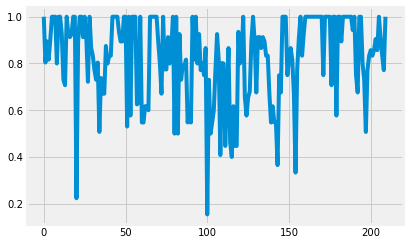

In [199]:
plt.plot(list_minScores)

In [200]:
df_pureOrders_new=df_pureOrders.copy(deep=True)

In [201]:
for indexes in grpby_df_pureProducts_StockCode.groups.values():
    if df_pureOrders.loc[indexes,'Description'].nunique()>1:
        correctDesc=df_pureOrders.loc[indexes[0],'Description']
        print(correctDesc)
        df_pureOrders_new.loc[indexes[1:],'Description']=correctDesc

WRAP, CAROUSEL
FLOWER FAIRY,5 SUMMER B'DRAW LINERS
VIPPASSPORT COVER 
LUNCH BAG RED RETROSPOT
SET/5 RED RETROSPOT LID GLASS BOWLS
LARGE CAKE TOWEL, CHOCOLATE SPOTS
SWISS ROLL TOWEL, PINK  SPOTS
GIN + TONIC DIET METAL SIGN
STRAWBERRY CERAMIC TRINKET BOX
PINK  POLKADOT PLATE 
ELEPHANT, BIRTHDAY CARD, 
CHRISTMAS HANGING HEART WITH BELL
GLITTER CHRISTMAS HEART 
KEY FOB , GARAGE DESIGN
JUMBO BAG SCANDINAVIAN PAISLEY
PARTY CONES CANDY TREE DECORATION
LADLE LOVE HEART RED 
LADLE LOVE HEART PINK
SET 10 LIGHTS NIGHT OWL
SMALL POPCORN HOLDER
FRYING PAN RED RETROSPOT
EASTER DECORATION SITTING BUNNY
DECORATION HEN ON NEST, HANGING
DECORATION , WOBBLY RABBIT , METAL 
DECORATION , WOBBLY CHICKEN, METAL 
LUNCH BAG SUKI  DESIGN 
MONEY BOX FIRST ADE DESIGN
SET OF 36 DOILIES SPACEBOY DESIGN 
FAIRY TALE COTTAGE NIGHTLIGHT
PICNIC BASKET WICKER SMALL
PACK OF 6 PANNETONE GIFT BOXES
CHRISTMAS GINGHAM HEART
CHRISTMAS MUSICAL ZINC HEART 
CHRISTMAS RETROSPOT HEART WOOD
HAND WARMER RED POLKA DOT
SWEETHEART CAKES

In [202]:
df_pureOrders.nunique().filter(['Description','StockCode']),df_pureOrders_new.nunique().filter(['Description','StockCode'])

(Description    3854
 StockCode      3645
 dtype: int64,
 Description    3627
 StockCode      3645
 dtype: int64)

obs: there are descriptions having multiple stockcodes

i.e. one product is having different stockCodes

info: we will not make them uniform, as descriptions are easier to handle for clustering of products

### Recreate X

info: some descriptions from list_differentDescriptions are expressed in the combination of columns of X

in a way X is having "repeated rows"

Also since the unique descriptions have been changed, we need to change X

do: handle the "repeated rows"

In [203]:
df_descriptions_new = pd.DataFrame(df_pureOrders_new['Description'].unique()).rename(columns = {0:'Description'})

In [204]:
keywords_new, keywords_roots_new, keywords_select_new, count_keywords_new = keywords_inventory(df_descriptions_new)

In [205]:
# its  a list of lists containing word and its occurance 
list_products_new = []
for k,v in count_keywords_new.items():
    word = keywords_select_new[k]
    
    # filter 1: word is not in the following list
    if word in ['pink', 'blue', 'tag', 'green', 'orange', 'set']: continue
    
    # filter 2: length of the word is less than 3 or the word occurs less than 13 times
    if len(word) < 3 : continue
    
    # filter 3: the word is + or /
    if ('+' in word) or ('/' in word): continue
    
    list_products_new.append([word, v])

list_products_new.sort(key = lambda x:x[1], reverse = True)
print('length:', len(list_products_new))
print(list_products_new)

length: 1336
[['heart', 247], ['vintage', 187], ['bag', 151], ['box', 142], ['glass', 138], ['christmas', 131], ['design', 120], ['candle', 120], ['flower', 116], ['holder', 108], ['decorative', 98], ['metal', 93], ['retrospot', 87], ['card', 86], ['necklac', 82], ['paper', 75], ['silver', 68], ['cake', 65], ['mug', 64], ['polkadot', 63], ['sign', 62], ['egg', 61], ['bracelet', 61], ['cover', 60], ['tin', 59], ['wrap', 57], ['pack', 55], ['art', 55], ['bowl', 55], ['star', 54], ['garden', 54], ['wall', 53], ['tea', 52], ['cushion', 50], ['mini', 49], ['ivory', 48], ['home', 47], ['frame', 47], ['mirror', 47], ['ring', 46], ['earrings', 46], ['cream', 44], ['gift', 44], ['bottle', 43], ['bird', 42], ['clock', 42], ['letter', 42], ['paisley', 41], ['party', 41], ['ribbon', 40], ['charm', 40], ['wood', 39], ['easter', 39], ['garland', 38], ['hook', 37], ['bead', 37], ['photo', 36], ['water', 35], ['jar', 35], ['drawer', 35], ['cup', 35], ['gold', 35], ['skull', 34], ['tray', 34], ['zinc',

In [206]:
list_Descriptions_new = df_pureOrders_new['Description'].unique()
X_new = pd.DataFrame()
for key, occurence in list_products_new:
    # take each line (x) from list of unique descriptions new
    # see if the key in the for loop is in that x or not
    # take int() of the boolean result (i.e. 0 or 1)
    # atach that vertical list as a column in x for each key
    X_new.loc[:, key] = list(   map(  lambda x:int(key.upper() in x.upper()), list_Descriptions_new  )    )

In [207]:
df_pureOrders_new.nunique().filter(['Description'])

Description    3627
dtype: int64

In [208]:
X_new.shape

(3627, 1336)

In [209]:
X_new.to_csv('X_new.csv',index=False)

In [210]:
df_pureOrders_new.to_csv('pure_placedOrders_new.csv',index=False)

# Product category based on unit price

In [211]:
df_pureOrders_new=pd.read_csv('pure_placedOrders_new.csv',dtype={'InvoiceNo':str,'CustomerID':str},parse_dates=['InvoiceDate'])

In [212]:
X_new=pd.read_csv('X_new.csv')

In [213]:
X_new

,heart,vintage,bag,box,glass,christmas,design,candle,flower,holder,...,pick,naughts,blueberry,fondant,chrome,sil't,squ,czech,puncture,country
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3622,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3624,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3625,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [214]:
df_pureOrders_new['UnitPrice'].describe()

count    383873.000000
mean          2.867834
std           4.135378
min           0.040000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

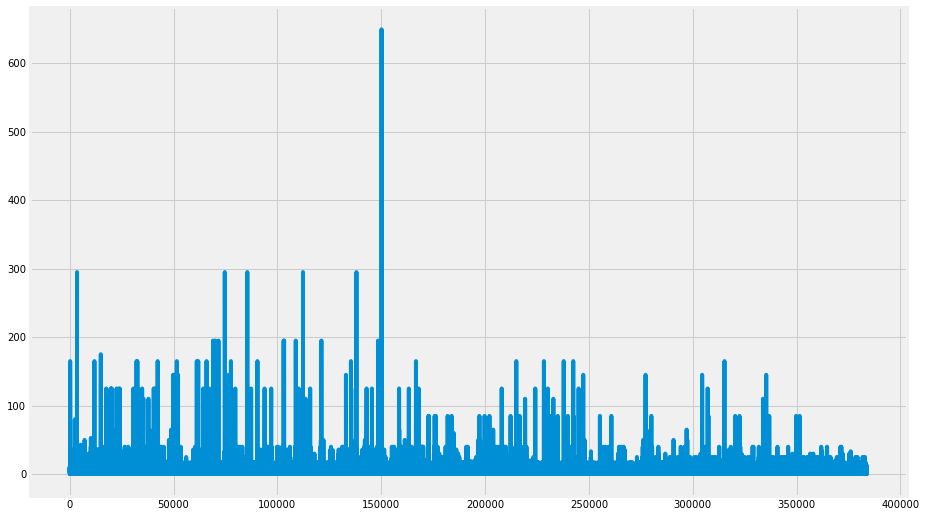

In [215]:
plt.figure(figsize=(14,9))
plt.plot(df_pureOrders_new['UnitPrice'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2044be617c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2044be61e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x2044be61460>],
 'medians': [<matplotlib.lines.Line2D at 0x2044be5c580>],
 'fliers': [<matplotlib.lines.Line2D at 0x2044be5c8e0>],
 'means': []}

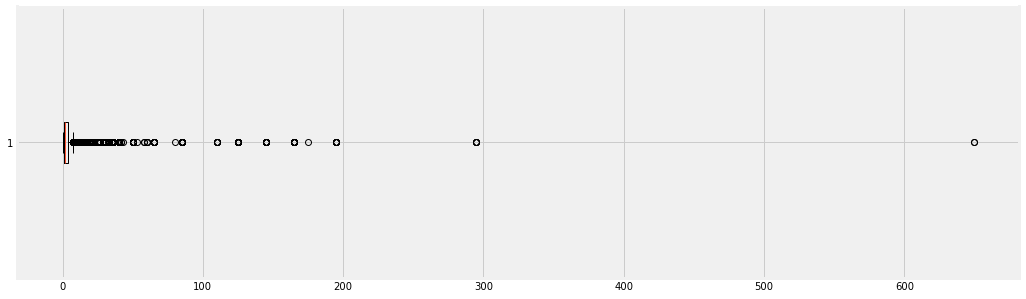

In [216]:
plt.figure(figsize=(16,5))
plt.boxplot(df_pureOrders_new['UnitPrice'],vert=False)

check: a product is having same unitprice throuhout data

In [217]:
grpby_df_pureProducts_new_Description = df_pureOrders_new.groupby('Description')

In [218]:
list_differencesUnitpriceInWholeData_wrtDescr=[]
for indexes in grpby_df_pureProducts_new_Description.groups.values():
        list_differencesUnitpriceInWholeData_wrtDescr.append(max(df_pureOrders_new.loc[indexes,'UnitPrice'])-min(df_pureOrders_new.loc[indexes,'UnitPrice']))

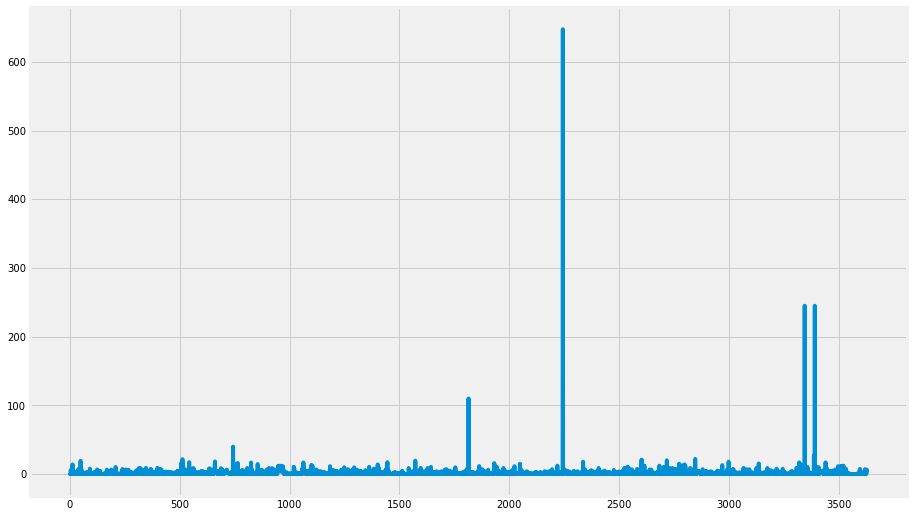

In [219]:
plt.figure(figsize=(14,9))
plt.plot(list_differencesUnitpriceInWholeData_wrtDescr)

obs: unit prices are for some descriptions throughout the data

we want uniformity in the unit prices for each stock code defined by stockcode

In [220]:
threshold = [0, 1, 2, 3, 5, 10]
label_col = []

threshold = [0, 1, 2, 3, 5, 10]

In [221]:
def getCat(mean):
    if 0<mean <= 1:
        return 0
    if 1<mean <= 2:
        return 1
    if 2<mean <= 3:
        return 2
    if 3<mean <= 5:
        return 3
    if 5<mean <= 10:
        return 4
    if 10<mean:
        return 5

In [222]:
labels_wrt_unitPrice=[]
for i, prod in enumerate(df_pureOrders_new['Description'].unique()):
    mean = df_pureOrders_new[ df_pureOrders_new['Description'] == prod]['UnitPrice'].mean()
    
    class_ = getCat(mean)
    
    #X_new.loc[i, label_col[class_]] = 1
    labels_wrt_unitPrice.append(class_)

In [223]:
labels_wrt_unitPrice[:5]

[2, 3, 3, 3, 3]

In [224]:
X_new.head(3)

,heart,vintage,bag,box,glass,christmas,design,candle,flower,holder,...,pick,naughts,blueberry,fondant,chrome,sil't,squ,czech,puncture,country
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [225]:
df_UniqueDescriptionCategories_wrt_UnitPrice=\
pd.concat(   [pd.DataFrame({'DescriptionUnique':df_pureOrders_new['Description'].unique()}),\
              pd.Series(labels_wrt_unitPrice)],\
          axis=1)

In [226]:
df_UniqueDescriptionCategories_wrt_UnitPrice.columns=['Uniquedesc','Labels_wrt_unitPrice']

In [227]:
df_UniqueDescriptionCategories_wrt_UnitPrice.head()

,Uniquedesc,Labels_wrt_unitPrice
0,WHITE HANGING HEART T-LIGHT HOLDER,2
1,WHITE METAL LANTERN,3
2,CREAM CUPID HEARTS COAT HANGER,3
3,KNITTED UNION FLAG HOT WATER BOTTLE,3
4,RED WOOLLY HOTTIE WHITE HEART.,3


In [228]:
df_UniqueDescriptionCategories_wrt_UnitPrice['Labels_wrt_unitPrice'].value_counts()

1    949
0    922
2    630
3    547
4    438
5    141
Name: Labels_wrt_unitPrice, dtype: int64

## create dfs

In [229]:
df_UniqueDescriptionCategories_wrt_UnitPrice.index=df_UniqueDescriptionCategories_wrt_UnitPrice['Uniquedesc']

In [230]:
df_UniqueDescriptionCategories_wrt_UnitPrice.head(2)

,Uniquedesc,Labels_wrt_unitPrice
Uniquedesc,,
WHITE HANGING HEART T-LIGHT HOLDER,WHITE HANGING HEART T-LIGHT HOLDER,2
WHITE METAL LANTERN,WHITE METAL LANTERN,3


In [231]:
df_UniqueDescriptionCategories_wrt_UnitPrice.drop('Uniquedesc',axis=1,inplace=True)

In [232]:
df_UniqueDescriptionCategories_wrt_UnitPrice.head(2)

,Labels_wrt_unitPrice
Uniquedesc,
WHITE HANGING HEART T-LIGHT HOLDER,2
WHITE METAL LANTERN,3


In [233]:
corres={}

for key,value in zip(df_UniqueDescriptionCategories_wrt_UnitPrice.index,\
                     df_UniqueDescriptionCategories_wrt_UnitPrice['Labels_wrt_unitPrice']):
    corres[key]=value

In [234]:
corres

{'WHITE HANGING HEART T-LIGHT HOLDER': 2,
 'WHITE METAL LANTERN': 3,
 'CREAM CUPID HEARTS COAT HANGER': 3,
 'KNITTED UNION FLAG HOT WATER BOTTLE': 3,
 'RED WOOLLY HOTTIE WHITE HEART.': 3,
 'SET 7 BABUSHKA NESTING BOXES': 4,
 'GLASS STAR FROSTED T-LIGHT HOLDER': 3,
 'HAND WARMER UNION JACK': 2,
 'ASSORTED COLOUR BIRD ORNAMENT': 1,
 "POPPY'S PLAYHOUSE BEDROOM ": 2,
 "POPPY'S PLAYHOUSE KITCHEN": 2,
 'FELTCRAFT PRINCESS CHARLOTTE DOLL': 3,
 'IVORY KNITTED MUG COSY ': 1,
 'BOX OF 6 ASSORTED COLOUR TEASPOONS': 3,
 'BOX OF VINTAGE JIGSAW BLOCKS ': 4,
 'BOX OF VINTAGE ALPHABET BLOCKS': 5,
 'HOME BUILDING BLOCK WORD': 4,
 'LOVE BUILDING BLOCK WORD': 4,
 'RECIPE BOX WITH METAL HEART': 4,
 'DOORMAT NEW ENGLAND': 4,
 'JAM MAKING SET WITH JARS': 3,
 'RED COAT RACK PARIS FASHION': 3,
 'YELLOW COAT RACK PARIS FASHION': 3,
 'BLUE COAT RACK PARIS FASHION': 3,
 'BATH BUILDING BLOCK WORD': 4,
 'ALARM CLOCK BAKELIKE PINK': 3,
 'ALARM CLOCK BAKELIKE RED ': 3,
 'ALARM CLOCK BAKELIKE GREEN': 3,
 'PANDA AND B

In [235]:
df_pureOrders_new.head()

,InvoiceNo,StockCode,Description,InvoiceDate,UnitPrice,CustomerID,Country,FinalQuantity
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,2.55,17850,United Kingdom,6
1,536365,71053,WHITE METAL LANTERN,2010-12-01 08:26:00,3.39,17850,United Kingdom,6
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,2.75,17850,United Kingdom,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,3.39,17850,United Kingdom,6
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,3.39,17850,United Kingdom,6


In [236]:
df_pureOrders_new['{}'.format('Labels_wrt_unitPrice')] =\
df_pureOrders_new.loc[:, 'Description'].map(corres)

In [237]:
df_pureOrders_new.head(1)

,InvoiceNo,StockCode,Description,InvoiceDate,UnitPrice,CustomerID,Country,FinalQuantity,Labels_wrt_unitPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,2.55,17850,United Kingdom,6,2


In [238]:
df_pureOrders_new.isnull().sum()

InvoiceNo               0
StockCode               0
Description             0
InvoiceDate             0
UnitPrice               0
CustomerID              0
Country                 0
FinalQuantity           0
Labels_wrt_unitPrice    0
dtype: int64

a new df is created having one column for product labels according to unitprice

product categories with respect to NLP or description is in another notebook